# Machine Learning Pipeline - Data Analysis

En los siguientes cuadernos, repasaremos la implementación de cada uno de los pasos en el Pipeline de Aprendizaje Automático.

Discutiremos:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring


Usaremos el conjunto de datos de precios de viviendas disponible en [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Consulta a continuación para más detalles.

===================================================================================================

## Predicción del Precio de Venta de Casas

El objetivo del proyecto es construir un modelo de aprendizaje automático para predecir el precio de venta de viviendas basado en diferentes variables explicativas que describen aspectos de las casas residenciales.


### ¿Por qué es esto importante?

Predecir los precios de las viviendas es útil para identificar inversiones fructíferas o para determinar si el precio anunciado de una casa está sobreestimado o subestimado.


### ¿Cuál es el objetivo del modelo de aprendizaje automático?

Nuestro objetivo es minimizar la diferencia entre el precio real y el precio estimado por nuestro modelo. Evaluaremos el rendimiento del modelo con el:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).


### ¿Cómo descargo el conjunto de datos?

- Visita [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Desplázate hacia la parte inferior de la página, haz clic en el enlace **'train.csv'**, y luego haz clic en el botón azul 'descargar' hacia la derecha de la pantalla para descargar el conjunto de datos.

- El archivo se descargará con el nombre de **'test.csv'** y guárdalo en el directorio junto con los cuadernos.



**Notas:**

-  Necesitas estar conectado a Kaggle para poder descargar los conjuntos de datos.
-  Necesitas aceptar los términos y condiciones de la competencia para poder descargar el conjunto de datos.

# Data Analysis

Vamos a proceder a cargar el conjunto de datos.

In [7]:
# para manejar conjuntos de datos
import pandas as pd
import numpy as np

# para ploteo
import matplotlib.pyplot as plt
import seaborn as sns

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

In [8]:
# cargar dataset
data = pd.read_csv('./Input/train.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
# Eliminamos Id, ya que es solo un numero para identificar cada casa
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

El conjunto de datos de precios de casas contiene 1460 filas, es decir, casas, y 80 columnas, es decir, variables.

79 son variables predictivas y 1 es la variable objetivo: SalePrice

## Analysis

**Analizaremos lo siguiente:**

1. La variable objetivo (The target variable)
2. Tipos de variables (categóricas y numéricas)
3. Datos faltantes (Missing data)
4. Variables numéricas
    - Discretas
    - Continuas
    - Distribuciones
    - Transformaciones

5. Variables Categóricas
    - Cardinalidad
    - Etiquetas Raras
    - Mapeos Especiales
    
6. Recursos adicionales de Lectura

## Target

Comencemos explorando la distribución del objetivo.

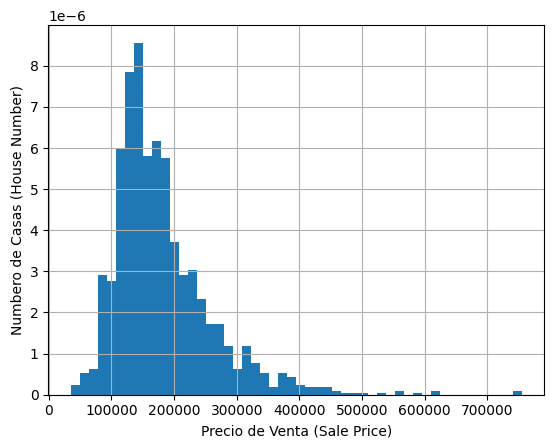

In [4]:
# Histograma para evaluar la distribución objetivo

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Numbero de Casas (House Number)')
plt.xlabel('Precio de Venta (Sale Price)')
plt.show()

Podemos ver que el objetivo es continuo y que la distribución está sesgada hacia la derecha.

Podemos mejorar la dispersión de los valores con una transformación matemática.

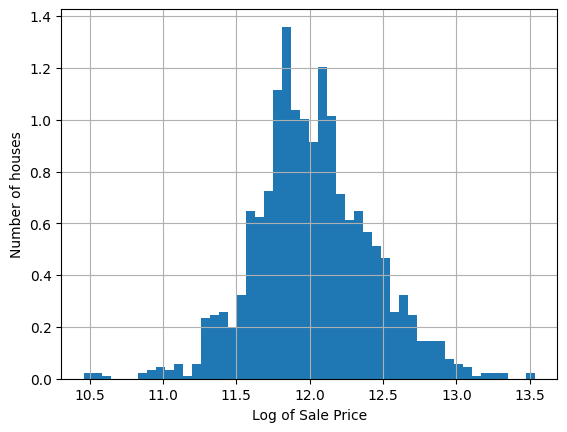

In [5]:
# Tranformamos el objetivo usando el logaritmo

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

Ahora la distribución luce más Gaussiana

## Variable Types

A continuación, identifiquemos las variables categóricas y numéricas.

In [10]:
# identifiquemos las variables categóricas
# capturaremos aquellas de tipo *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass también es categórica por definición, a pesar de sus valores numéricos
# (puedes encontrar las definiciones de las variables en el archivo data_description.txt
# disponible en Kaggle, en el mismo sitio web donde descargaste los datos)

# Adicionamos MSSubClass a la lista de categorical variables
cat_vars = cat_vars + ['MSSubClass']

# agreguemos MSSubClass a la lista de variables categóricas
len(cat_vars)

44

In [11]:
# Convertir todas las variables a categóricas
data[cat_vars] = data[cat_vars].astype('O')

In [12]:
# ahora identifiquemos las variables numéricas

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# Numero de Variables Categóricas
len(num_vars)

35

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [13]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

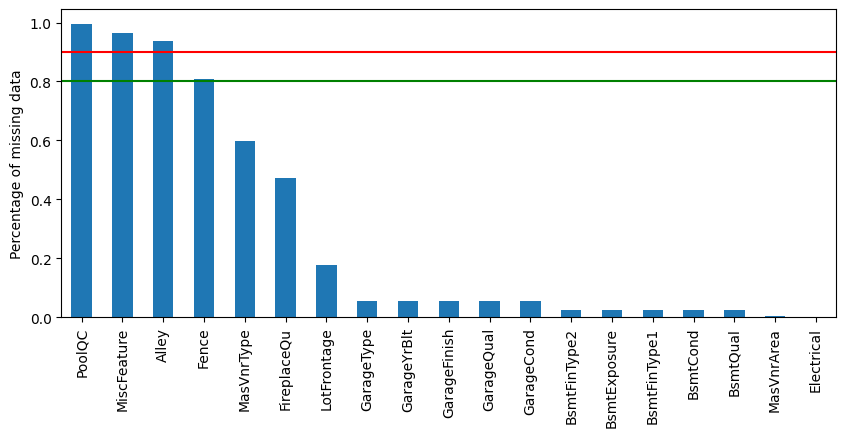

In [14]:
# plot

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [15]:
# hora podemos determinar cuáles variables, de aquellas con datos faltantes,
# son numéricas y cuáles son categóricas

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Numero de Variables Categóricas con na: ', len(cat_na))
print('Numero de Variables Numéricas con na: ', len(num_na))

Numero de Variables Categóricas con na:  16
Numero de Variables Numéricas con na:  3


In [16]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between missing data and Sale Price

Evaluemos el precio de la casa en aquellas observaciones donde falta información. Haremos esto para cada variable que muestre datos faltantes.

In [18]:
def analyse_na_value(df, var):

    # copiamos el dataframe, para no sobrescribir los datos originales
    # consulte el enlace para más detalles sobre pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # hagamos una variable intermedia que indique 1 si la
    # observación estaba faltante o 0 en caso contrario
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparemos el precio de venta medio en las observaciones donde faltan datos
    # vs las observaciones donde los datos están disponibles

    # determinamos el precio medio en los grupos 1 y 0,
    # y la desviación estándar del precio de venta,
    # y capturamos los resultados en un dataset temporal
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # Plotear en un gráfico de barras
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

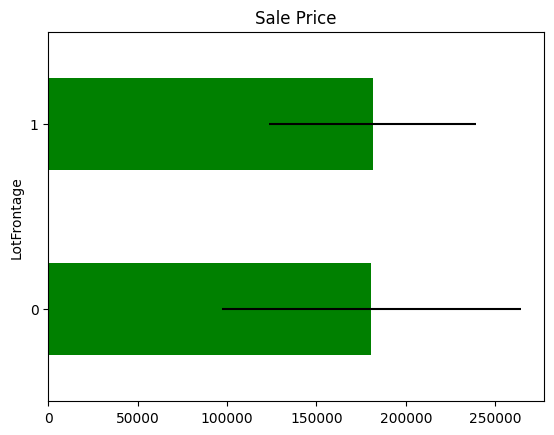

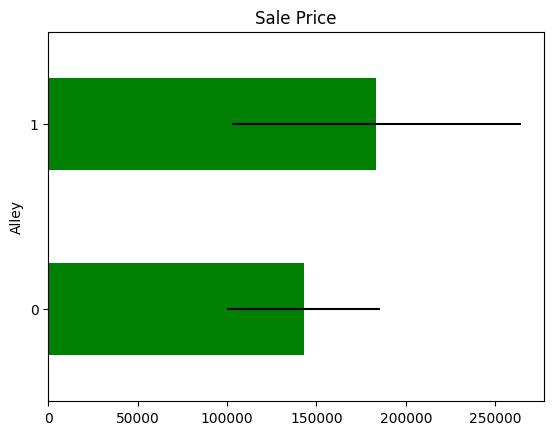

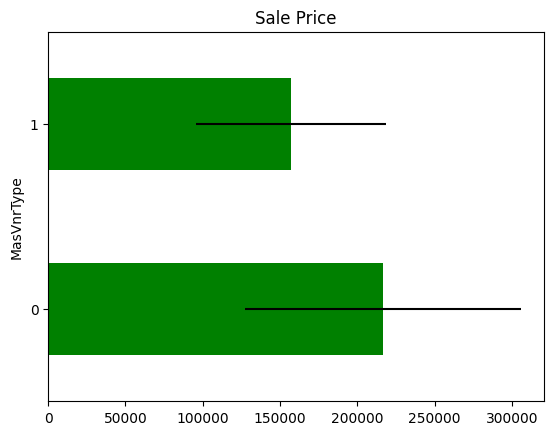

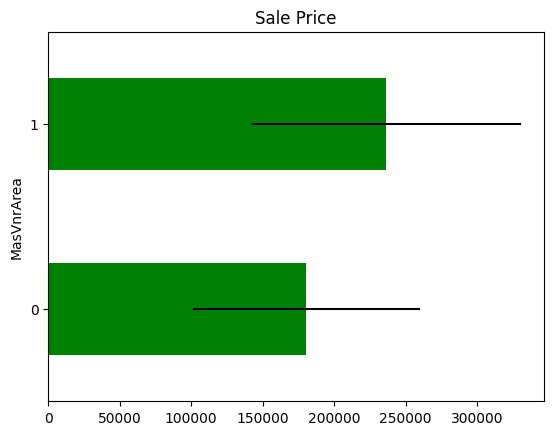

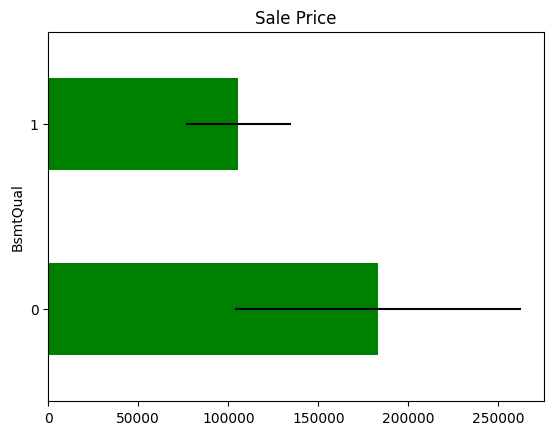

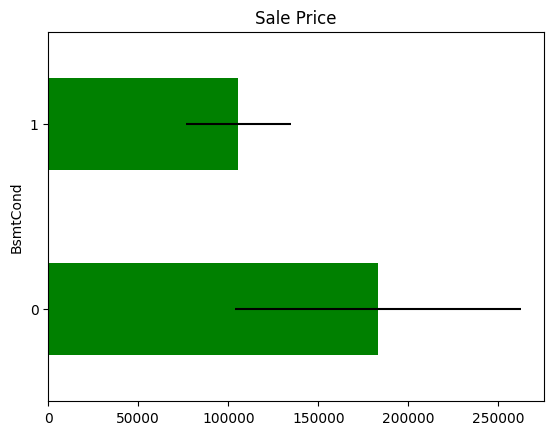

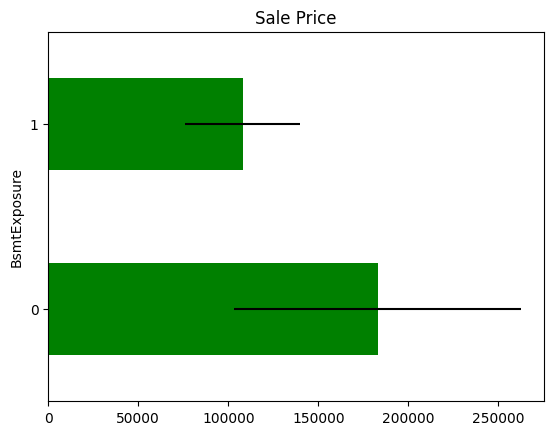

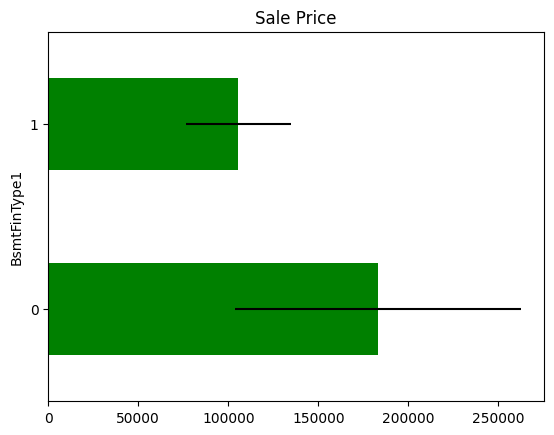

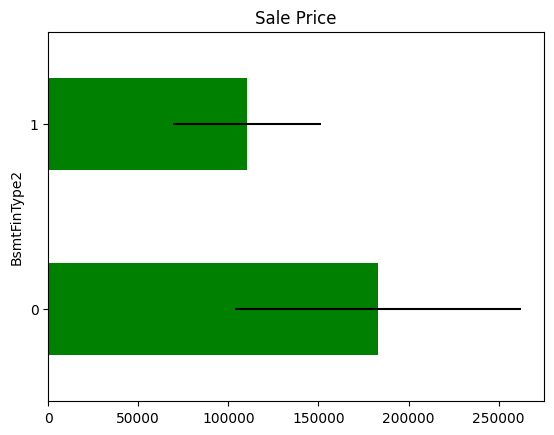

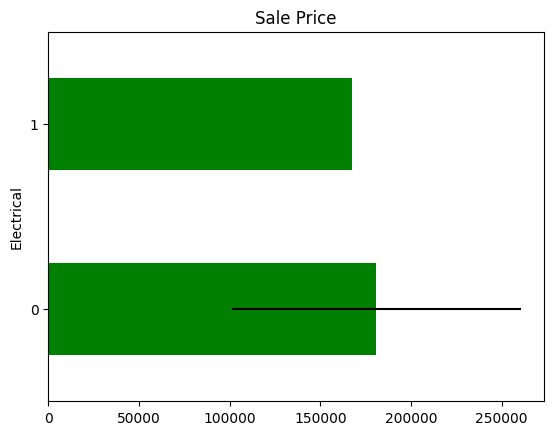

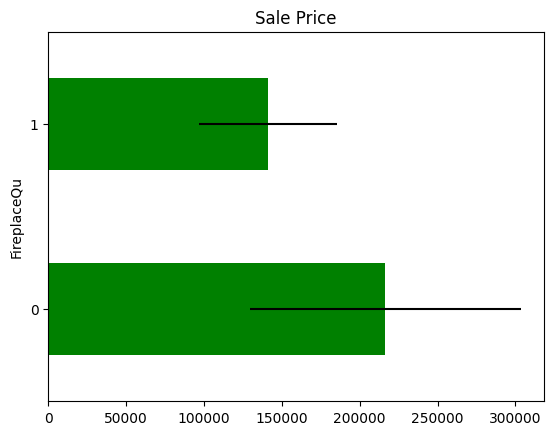

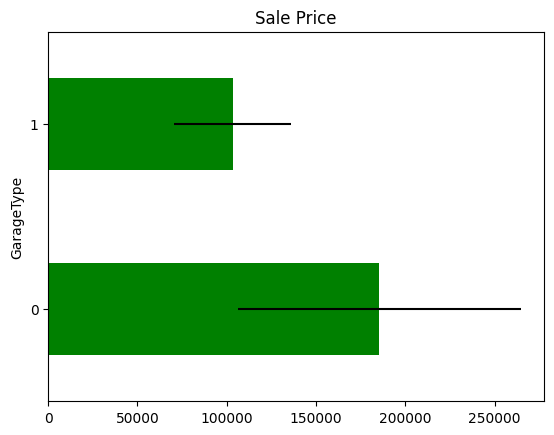

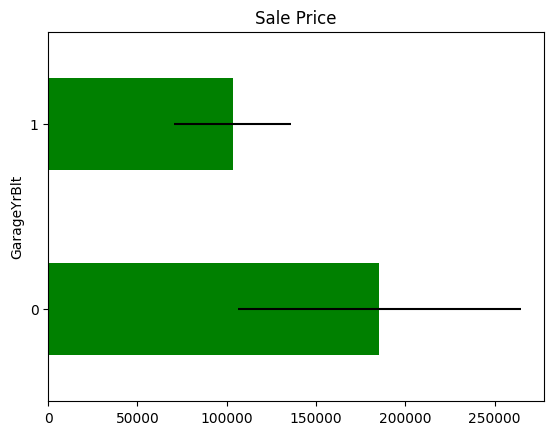

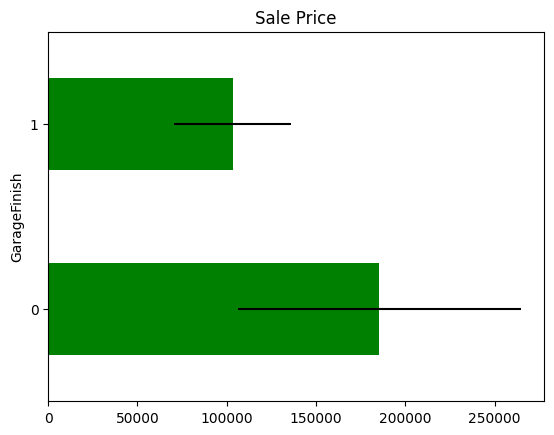

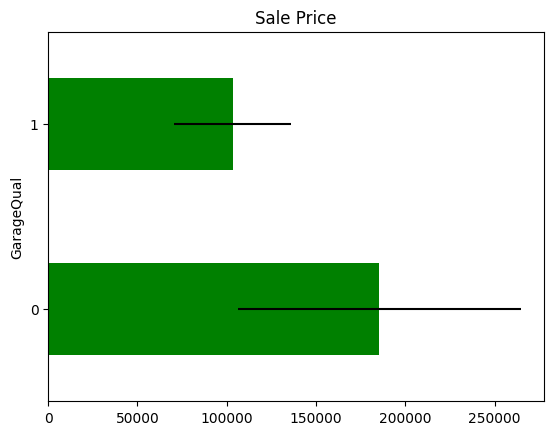

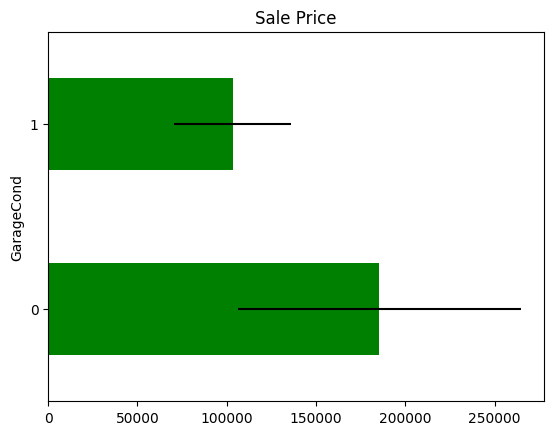

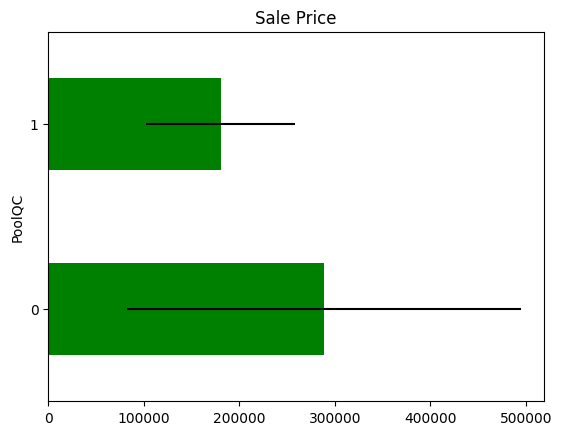

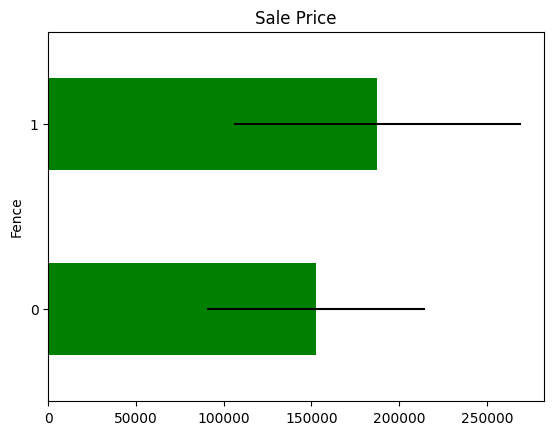

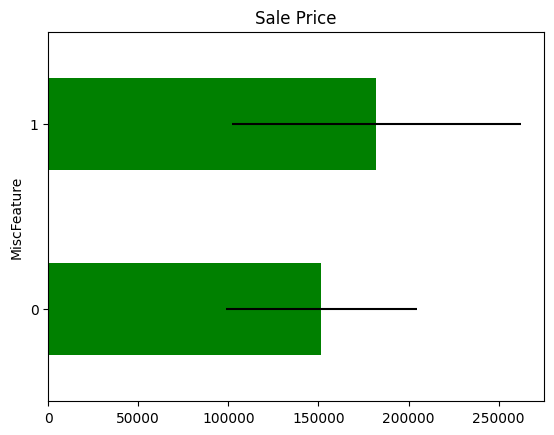

In [19]:
# ejecutemos la función en cada variable con datos faltantes

for var in vars_with_na:
    analyse_na_value(data, var)

En algunas variables, el precio de venta promedio en casas donde falta la información difiere del precio de venta promedio en casas donde existe la información. Esto sugiere que la falta de datos podría ser un buen predictor del precio de venta.

# Numerical variables

Vamos a identificar qué variables numéricas tenemos en el conjunto de datos.

In [20]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

## Temporal variables

Tenemos 4 variables de año en el conjunto de datos:

- YearBuilt: año en que la casa fue construida
- YearRemodAdd: año en que la casa fue remodelada
- GarageYrBlt: año en que se construyó un garaje
- YrSold: año en que la casa fue vendida

Generalmente, no usamos variables de fecha en su formato bruto. En su lugar, extraemos información de ellas. Por ejemplo, podemos capturar la diferencia en años entre el año en que la casa fue construida y el año en que la casa fue vendida.

In [21]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [22]:
# let's explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As expected, the values are years.

We can explore the evolution of the sale price with the years in which the house was sold:

Text(0, 0.5, 'Median House Price')

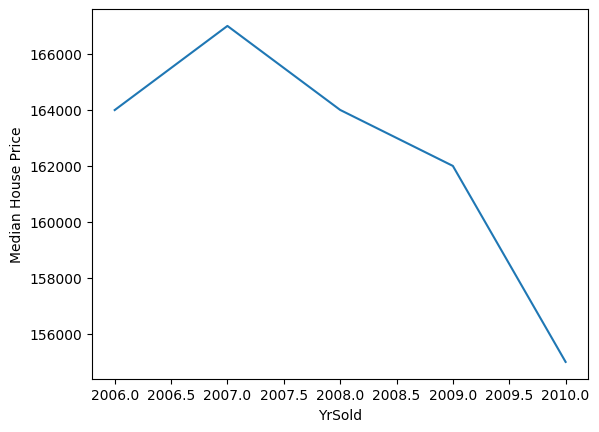

In [23]:
# plot median sale price vs year in which it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Ha habido una caída en el valor de las casas. Eso es inusual, en la vida real, los precios de las casas típicamente suben con el paso de los años.

Exploremos un poco más.

Grafiquemos el precio de venta vs el año en que fue construida.

Text(0, 0.5, 'Median House Price')

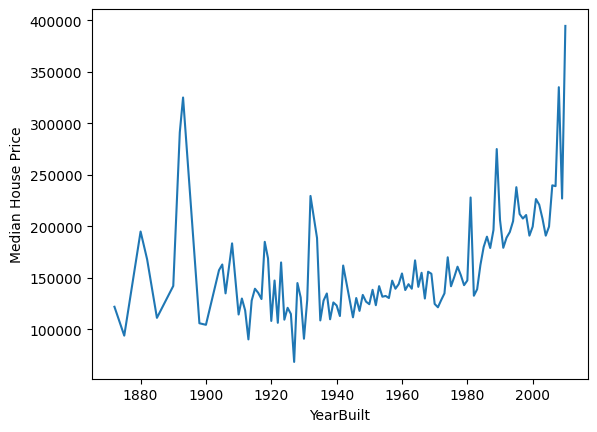

In [24]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Podemos ver que las casas recién construidas / más jóvenes tienden a ser más caras.

¿Podría ser que últimamente se han vendido casas más antiguas? Vamos a echar un vistazo a eso.

Para esto, capturaremos los años transcurridos entre las variables de Año y el año en que la casa fue vendida:

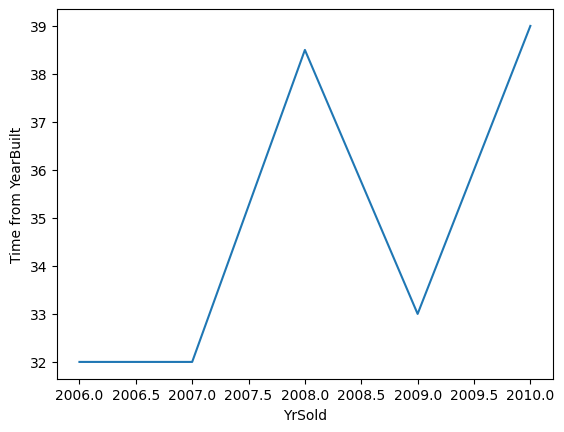

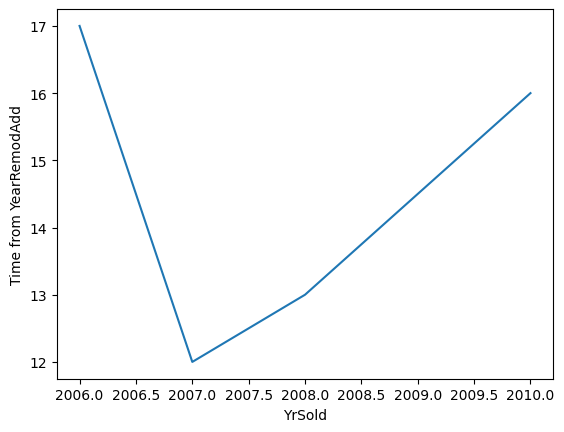

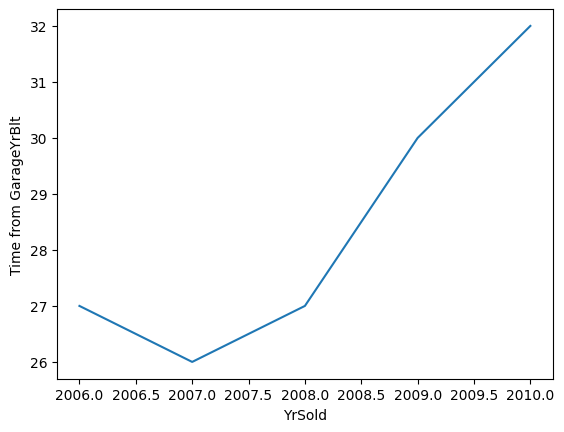

In [25]:
def analyse_year_vars(df, var):

    df = df.copy()

    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()


for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

A partir de las gráficas, vemos que hacia el 2010, las casas vendidas tenían garajes más antiguos y no habían sido remodeladas recientemente, lo que podría explicar por qué vemos precios de venta más bajos en los últimos años, al menos en este conjunto de datos.

Ahora podemos graficar el tiempo desde la última remodelación o el tiempo desde la construcción, y el precio de venta, para ver si hay una relación.

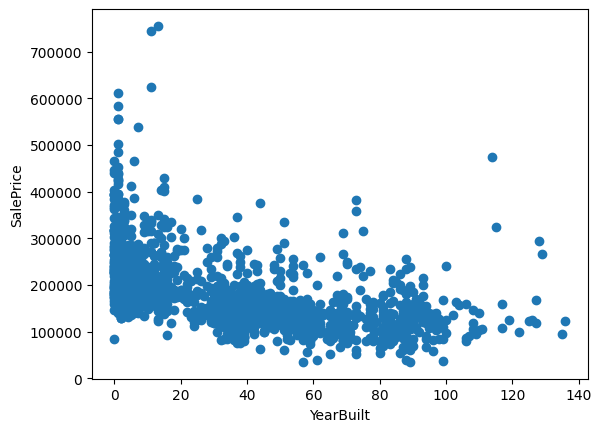

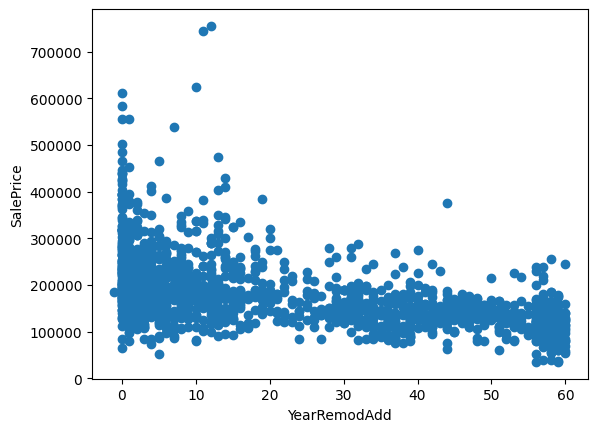

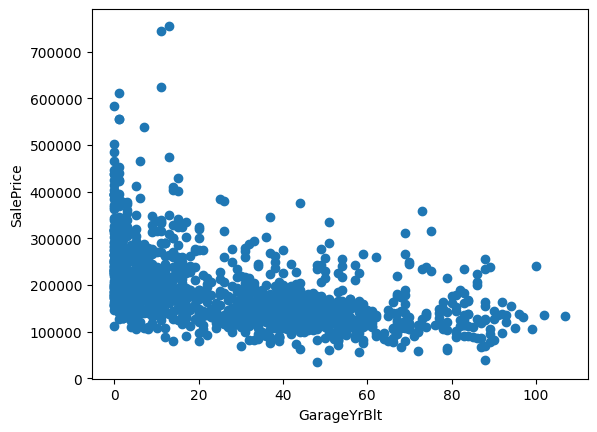

In [26]:
def analyse_year_vars(df, var):

    df = df.copy()

    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()


for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Vemos que hay una tendencia a una disminución en el precio con las casas más antiguas. En otras palabras, cuanto más tiempo haya entre la construcción o remodelación de la casa y la fecha de venta, menor será el precio de venta.

Lo cual tiene sentido, ya que esto significa que la casa tendrá una apariencia más antigua y potencialmente necesitará reparaciones.

## Discrete variables

Vamos a identificar cuáles variables son discretas, es decir, muestran un número finito de valores.

In [27]:
# hagamos una lista de variables discretas
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Numero de Variables Discretas: ', len(discrete_vars))

Numero de Variables Discretas:  13


In [28]:
# Visualizamos las Variables Discretas

data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

Estas variables discretas tienden a ser calificaciones (Qual) o escalas de evaluación (Cond), o se refieren al número de habitaciones, o unidades (FullBath, GarageCars), o indican el área de la habitación (KitchenAbvGr).

Esperamos precios más altos con números más grandes.

Vamos a analizar su contribución al precio de la casa.

MoSold es el mes en que la casa fue vendida.

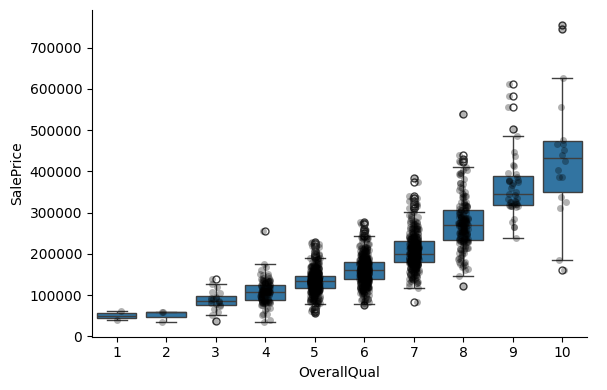

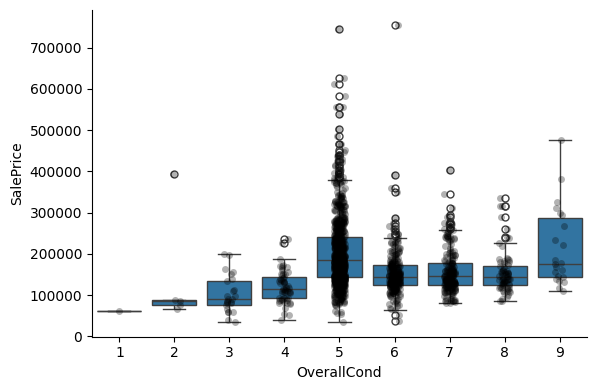

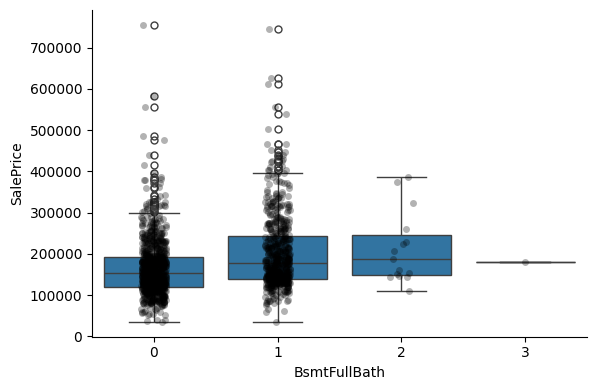

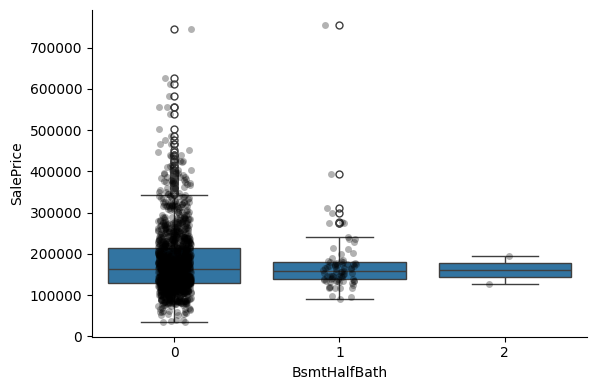

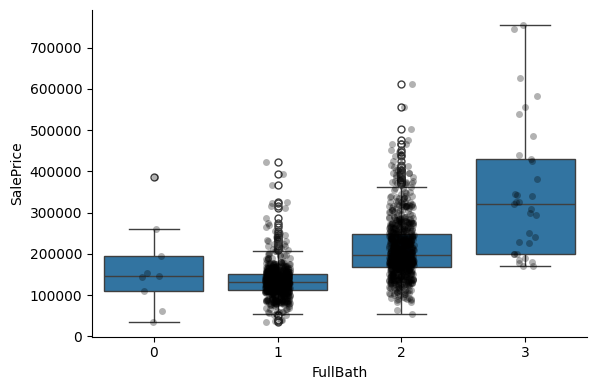

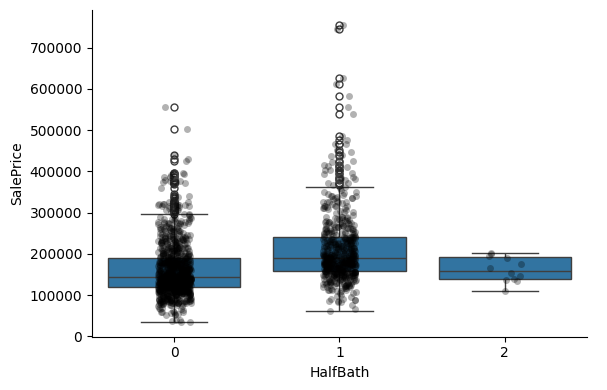

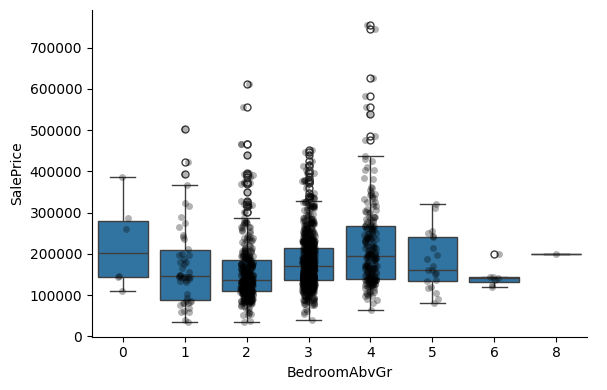

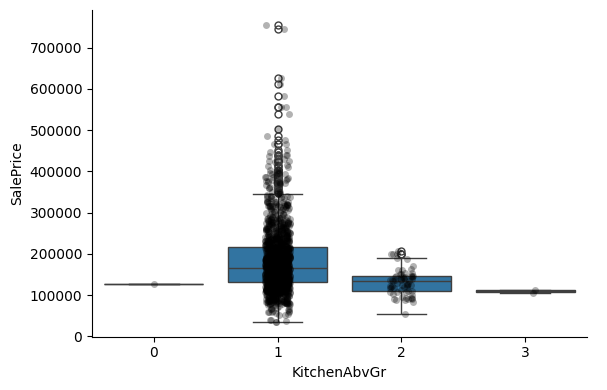

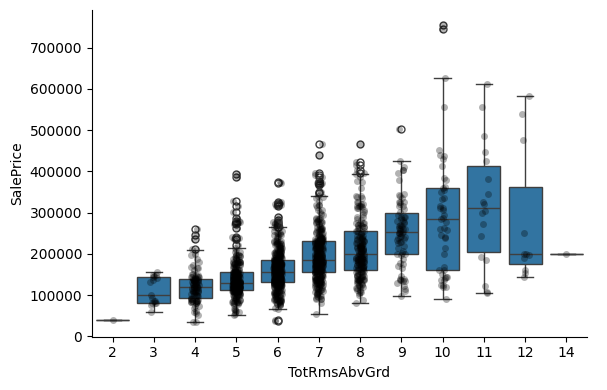

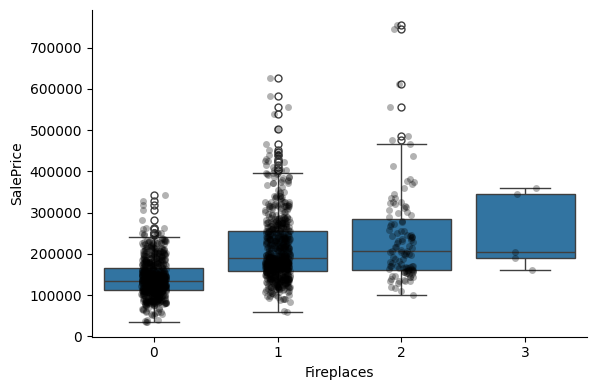

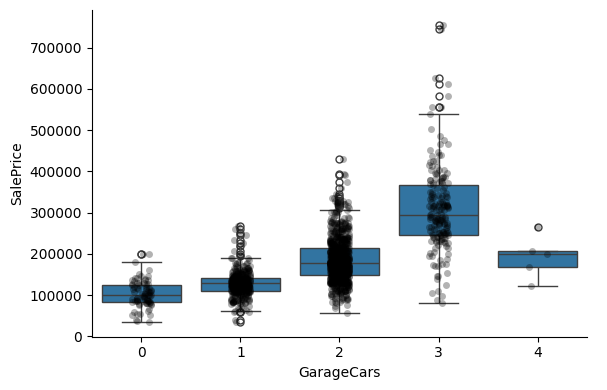

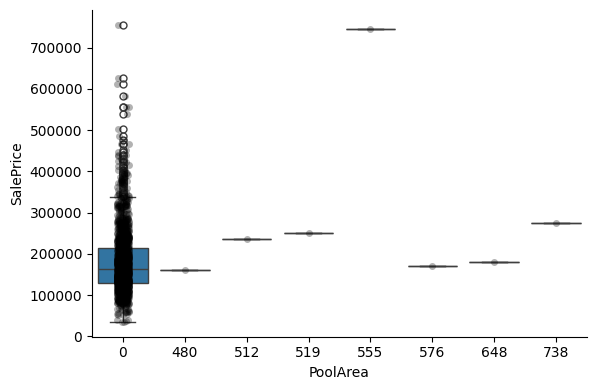

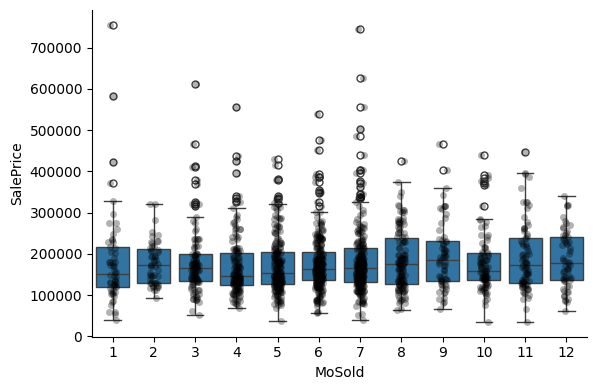

In [29]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Para la mayoría de las variables numéricas discretas, vemos un aumento en el precio de venta con la calidad, la condición general, el número de habitaciones o la superficie.

Para algunas variables, no vemos esta tendencia. Es probable que esa variable no sea un buen predictor del precio de venta.

## Continuous variables

Vamos a encontrar la distribución de las variables continuas. Consideraremos como variables continuas todas aquellas que no son temporales o discretas.

In [30]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [31]:
# Visualizamos las Variables Continuas

data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

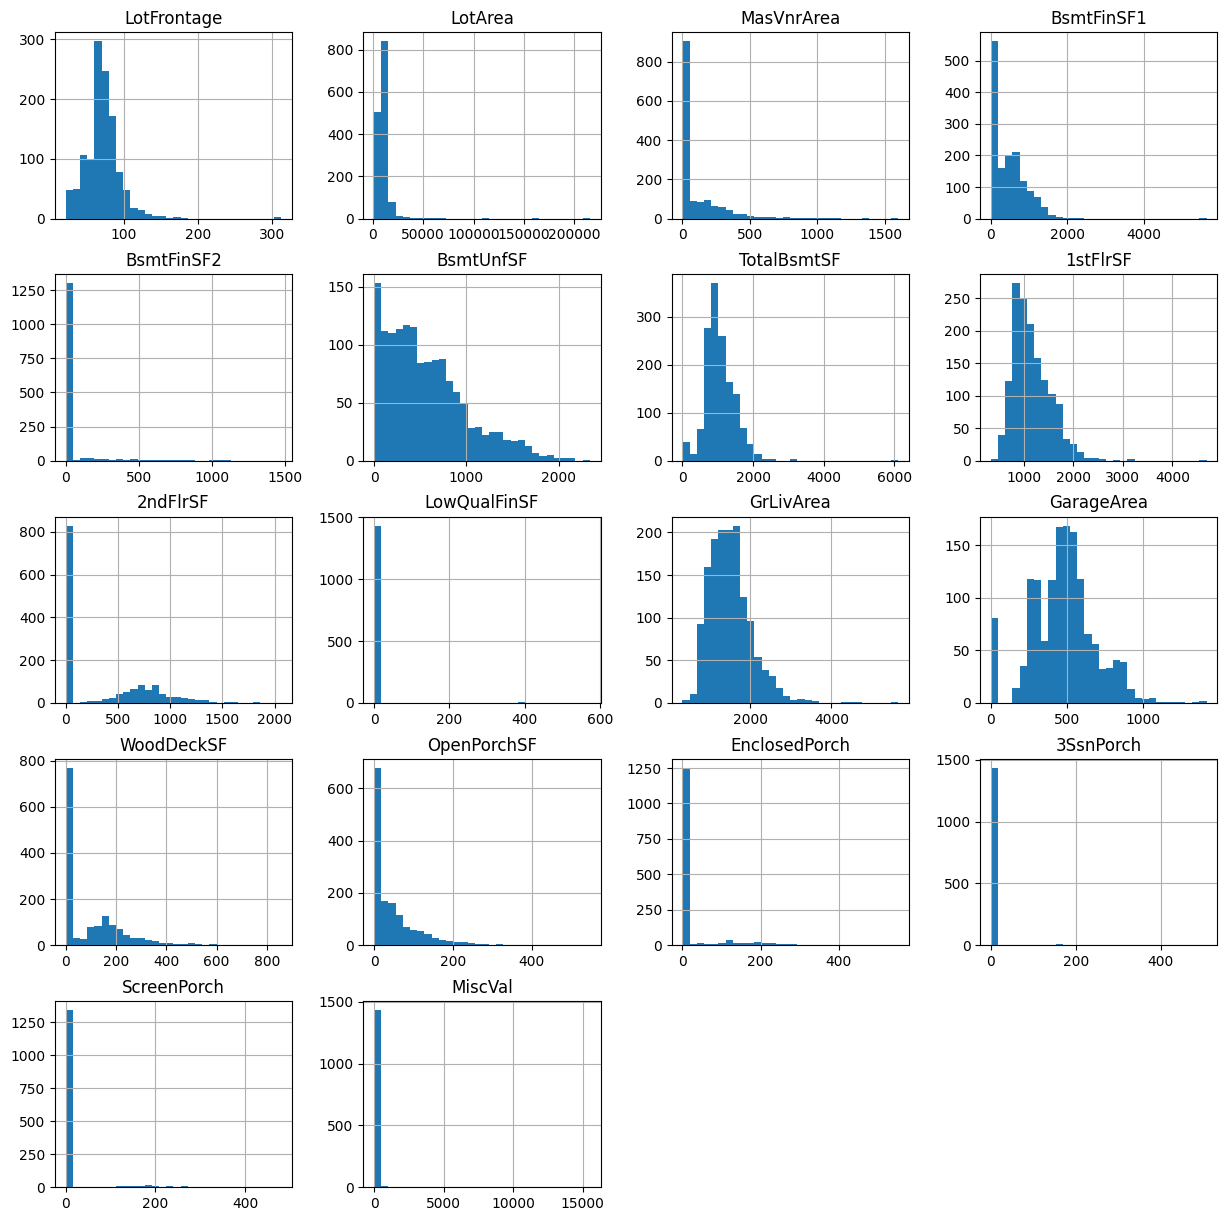

In [32]:
# Vamos a graficar histogramas para todas las variables continuas

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Las variables no están distribuidas normalmente. Y hay algunas en particular que están extremadamente sesgadas como 3SsnPorch, ScreenPorch y MiscVal.

A veces, transformar las variables para mejorar la dispersión de los valores, mejora el rendimiento del modelo. Pero es poco probable que una transformación ayude a cambiar la distribución de las variables extremadamente sesgadas de manera drástica.

Podemos aplicar una transformación Yeo-Johnson a variables como LotFrontage, LotArea, BsmUnfSF, y una transformación binaria a variables como 3SsnPorch, ScreenPorch y MiscVal.

Vamos a hacerlo.

In [33]:
# primero hagamos una lista con las variables extremadamente sesgadas
# para más adelante

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [34]:
# capturar las variables continuas restantes

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

### Yeo-Johnson transformation

In [35]:
data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455         60       RL         62.0     7917   Pave   NaN      Reg   
1456         20       RL         85.0    13175   Pave   NaN      Reg   
1457         70       RL         66.0     9042   Pave   NaN      Reg   
1458         20       RL         68.0     9717   Pave   NaN      Reg   
1459         20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...        

Error al transformar la variable LotFrontage: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
Error al transformar la variable MasVnrArea: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


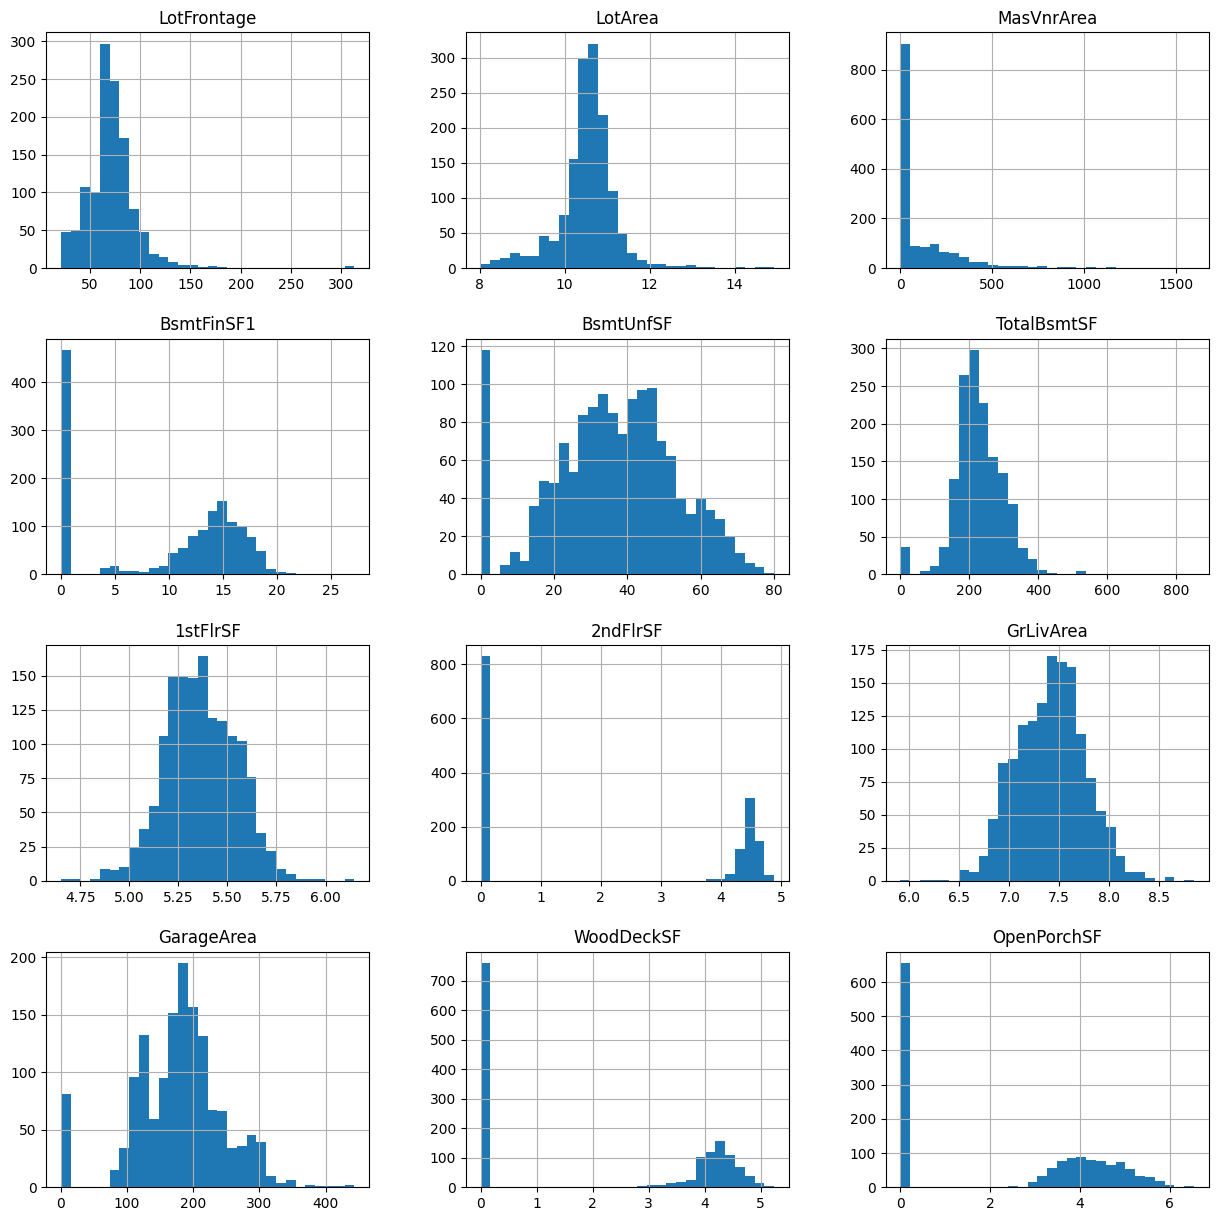

In [36]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

# Lista para almacenar variables problemáticas
problematic_vars = []

# Aplicar la transformación Yeo-Johnson a cada variable continua
for var in cont_vars:
    try:
        tmp[var], param = stats.yeojohnson(data[var])
    except Exception as e:
        print(f'Error al transformar la variable {var}: {e}')
        problematic_vars.append(var)

# Eliminar variables problemáticas de cont_vars
#cont_vars = [var for var in cont_vars if var not in problematic_vars]

# Graficar los histogramas de las variables transformadas
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [37]:
problematic_vars

['LotFrontage', 'MasVnrArea']

Para LotFrontage y MasVnrArea, la transformación no hizo un trabajo sorprendente.

Para las otras, los valores parecen estar distribuidos de manera más uniforme en el rango.

Si esto ayuda a mejorar el poder predictivo, está por verse. Para determinar si este es el caso, deberíamos entrenar un modelo con los valores originales y uno con los valores transformados, y determinar el rendimiento del modelo y la importancia de las características. Pero eso escapa del alcance de este curso.

Aquí, haremos una exploración visual rápida en su lugar:

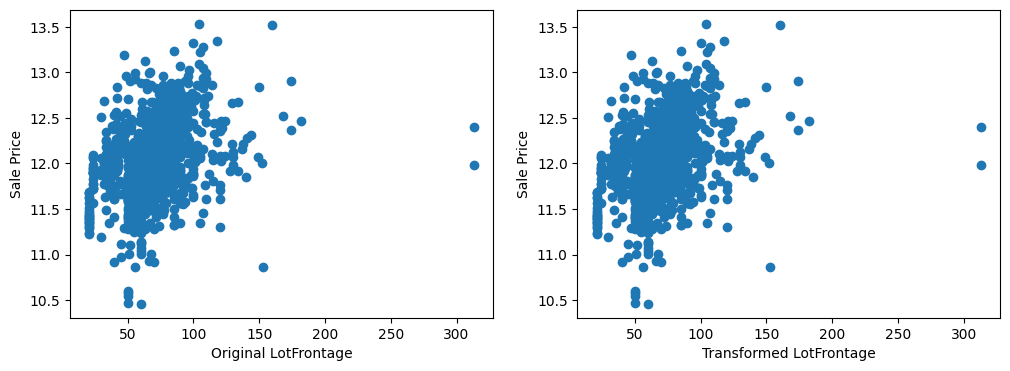

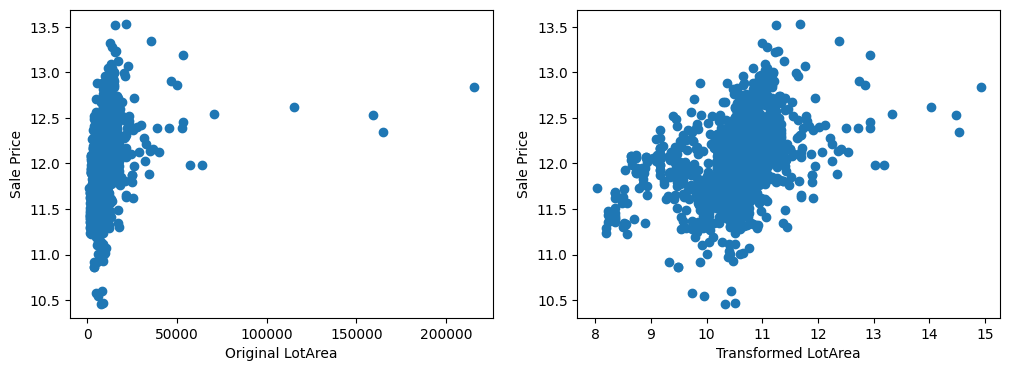

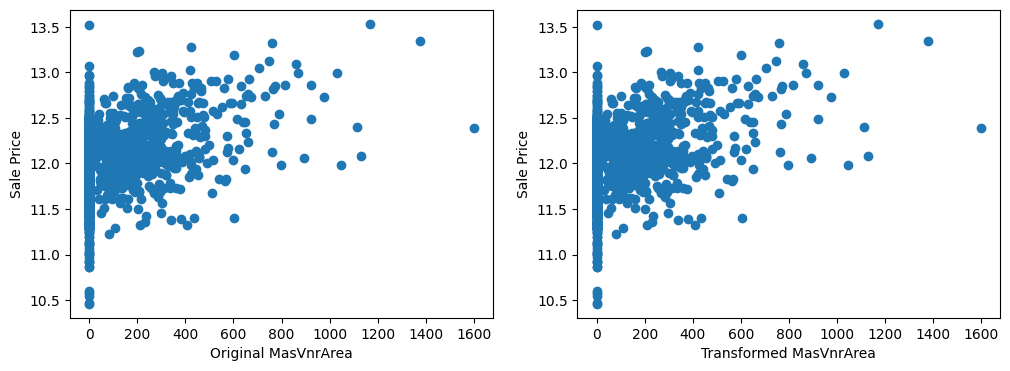

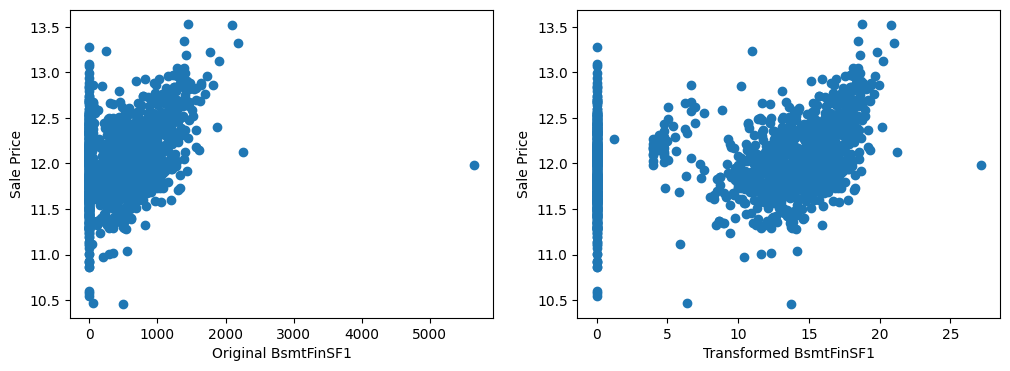

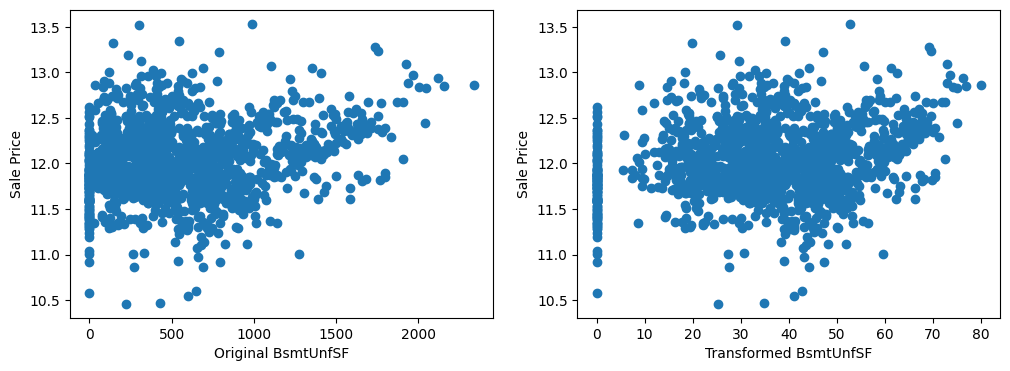

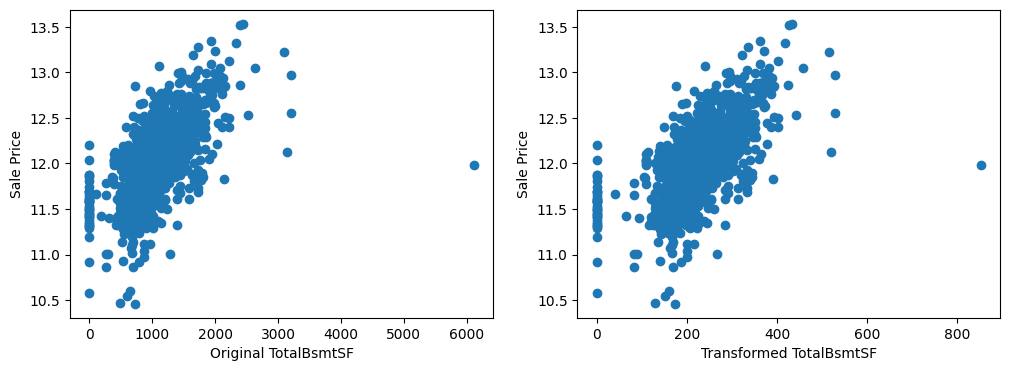

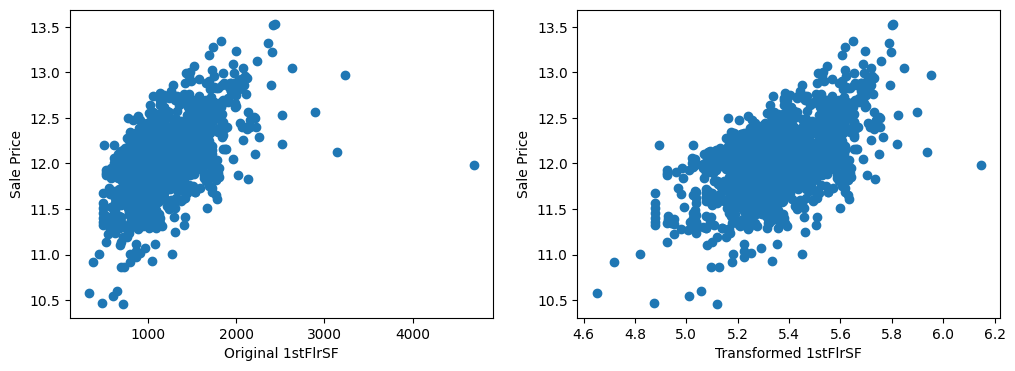

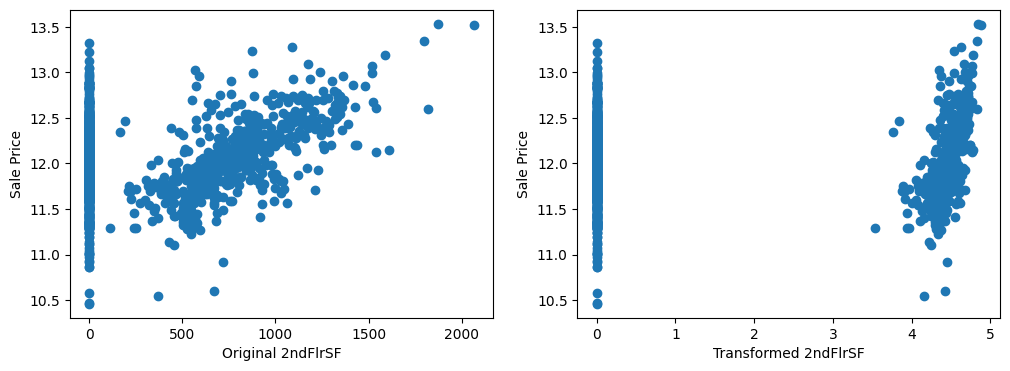

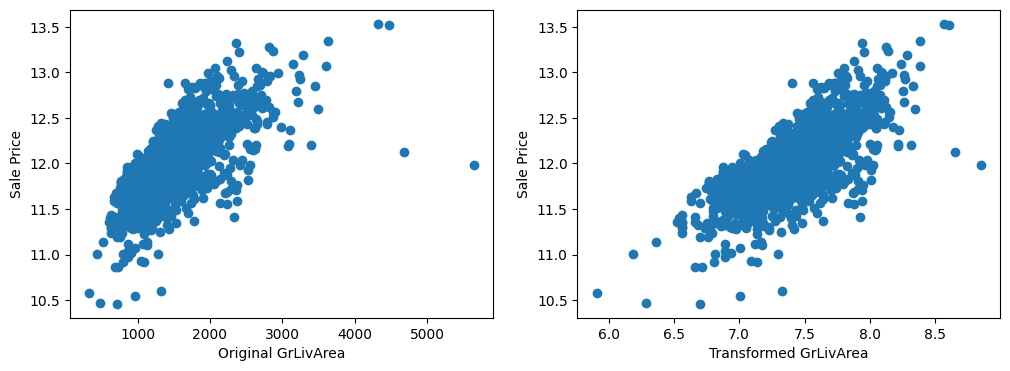

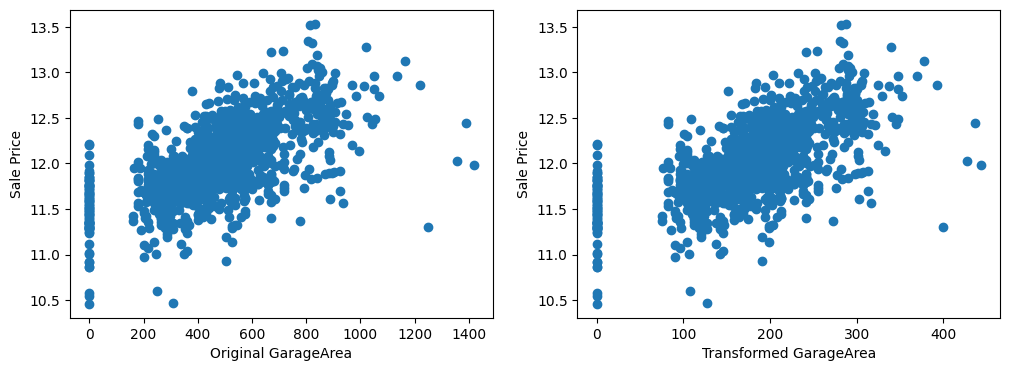

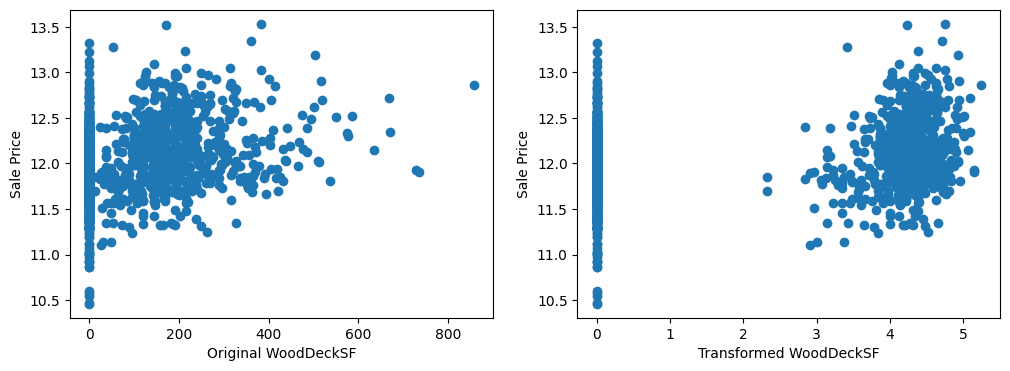

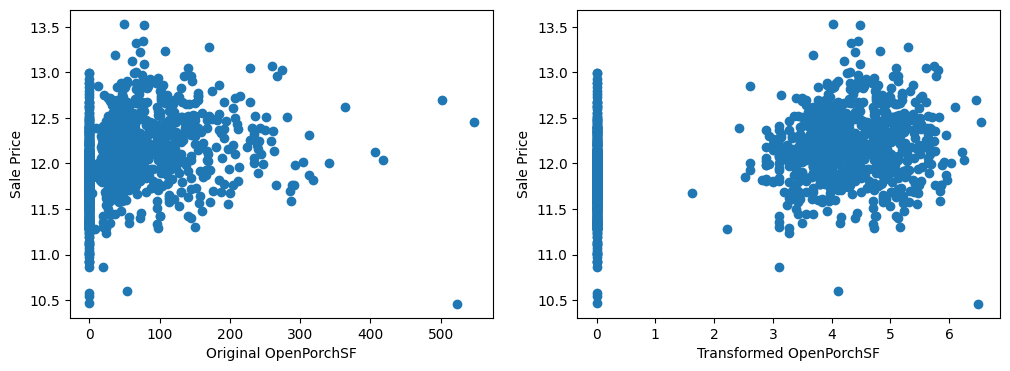

In [38]:
# vamos a graficar las variables originales o transformadas
# vs el precio de venta, y ver si hay una relación

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

A simple inspección visual sugiere que las transformaciones parecen mejorar la relación solo para LotArea.

Vamos a intentar una transformación diferente ahora. La mayoría de las variables contienen el valor 0, por lo que no podemos aplicar la transformación logarítmica, pero ciertamente podemos hacerlo para las siguientes variables:

["LotFrontage", "1stFlrSF", "GrLivArea"]

Así que hagamos eso y veamos si eso cambia la distribución de las variables y su relación con el objetivo.

 ### Logarithmic transformation

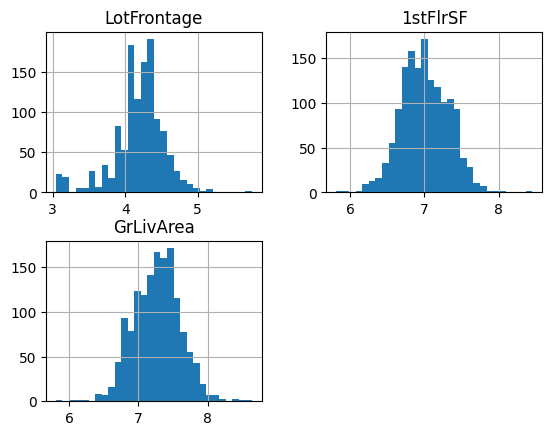

In [40]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

La distribución de las variables ahora parece más "gaussiana".

Vamos a evaluar su relación con el objetivo.

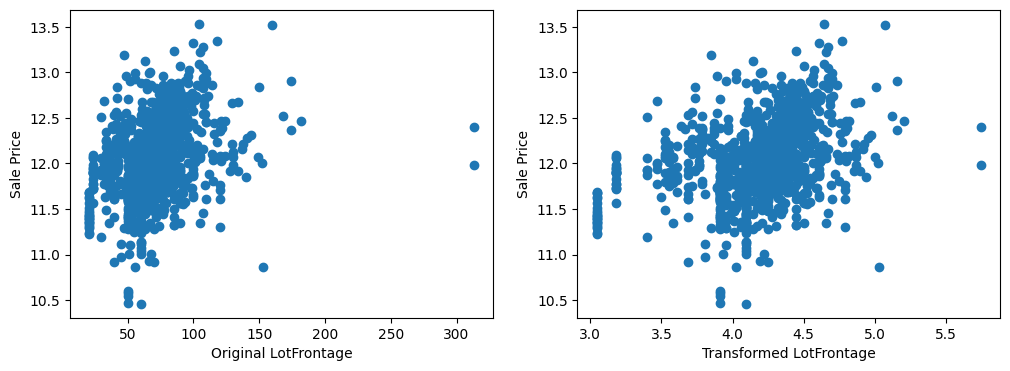

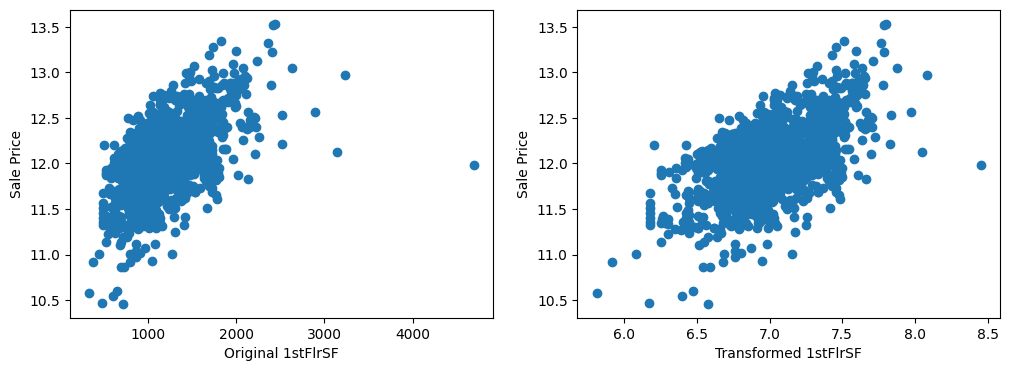

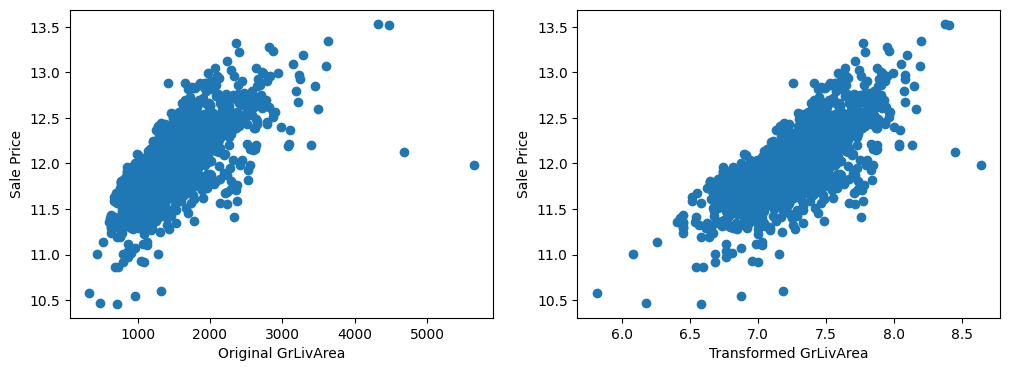

In [41]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Las variables transformadas tienen una mejor dispersión de los valores, lo que a su vez puede ayudar a hacer mejores predicciones.

## Skewed variables (Variables Sesgadas)

Vamos a transformarlas en variables binarias y ver cuán predictivas son:

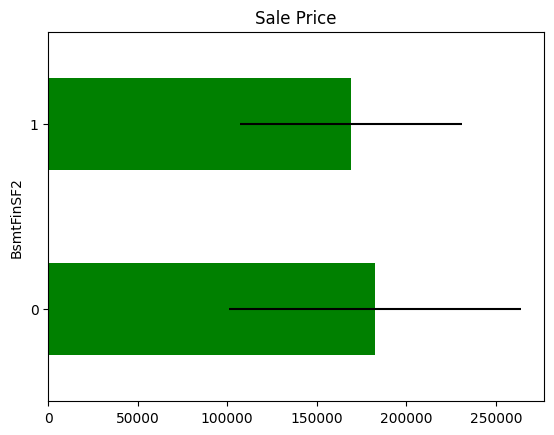

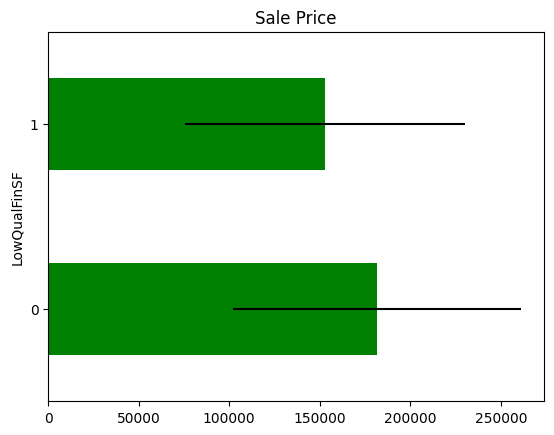

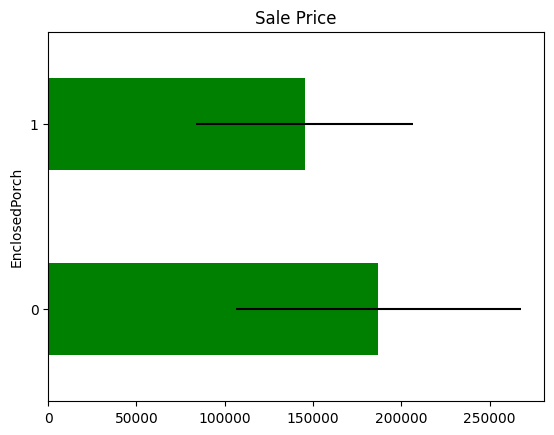

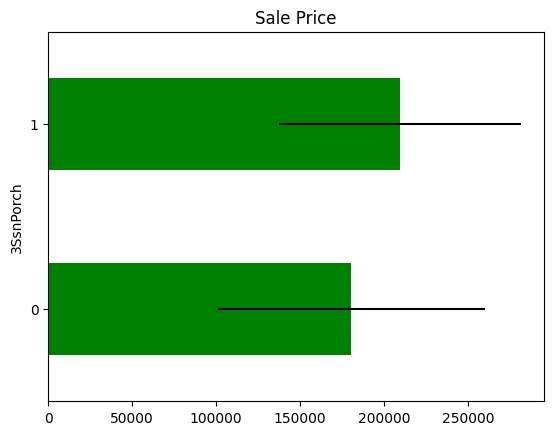

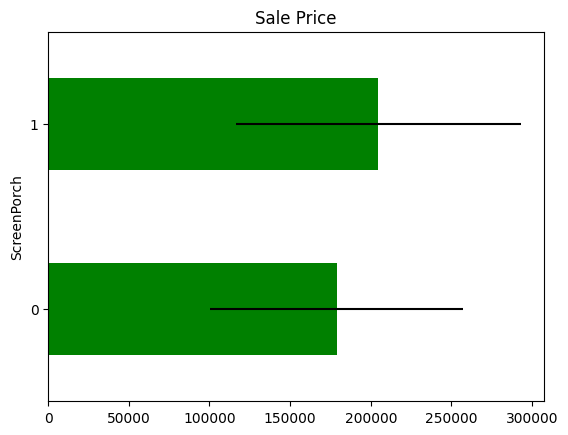

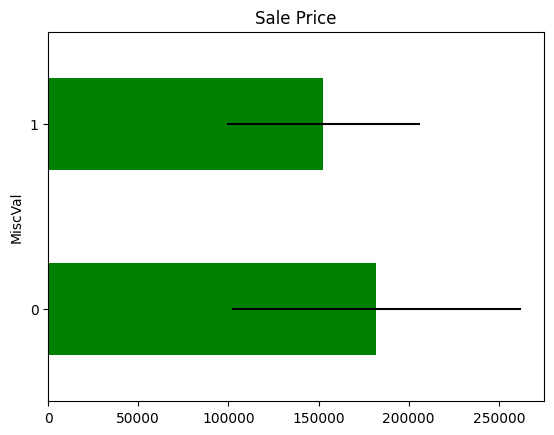

In [42]:
for var in skewed:

    tmp = data.copy()

    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)

    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

Parece haber una diferencia en el precio de venta en los valores mapeados, pero los intervalos de confianza se superponen, por lo que probablemente esto no sea significativo ni predictivo.

# Categorical variables

Vamos a analizar las variables categóricas presentes en el conjunto de datos.

In [43]:
print('Numero de Variables Categóricas: ', len(cat_vars))

Numero de Variables Categóricas:  44


In [44]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

## Number of labels: cardinality

Evaluemos cuántas categorías diferentes están presentes en cada una de las variables.

<Axes: >

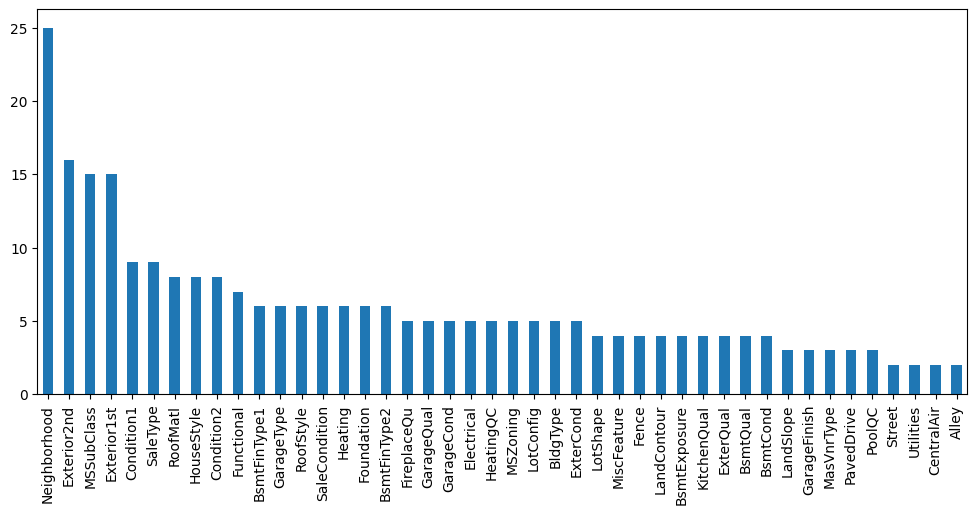

In [45]:
# we count unique categories with pandas unique()
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

Todas las variables categóricas muestran baja cardinalidad, lo que significa que tienen pocas etiquetas diferentes. Esto es bueno ya que no necesitaremos abordar la cardinalidad durante nuestra clase de ingeniería de características.

## Quality variables

Hay una serie de variables que se refieren a la calidad de algún aspecto de la casa, por ejemplo, el garaje, la cerca o la cocina. Reemplazaré estas categorías por números que aumenten con la calidad del lugar o habitación.

Las asignaciones se pueden obtener del sitio web de Kaggle. Un ejemplo:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical (Promedio)
- Fa =	Fair (Regular)
- Po = Poor (Pobre)

In [46]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [47]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [48]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [49]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [50]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [51]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

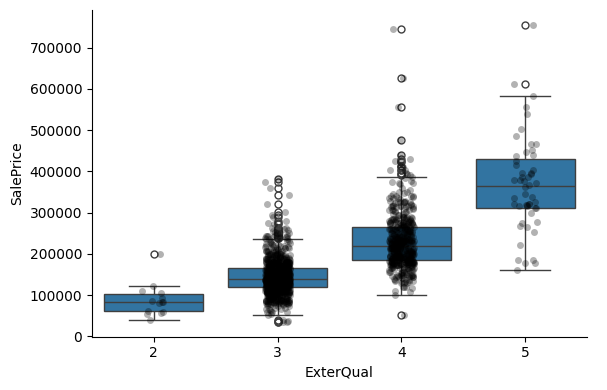

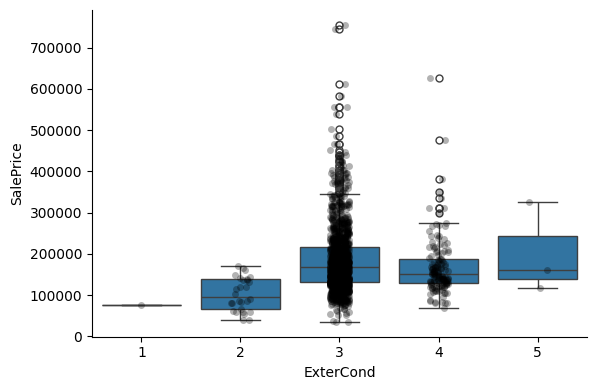

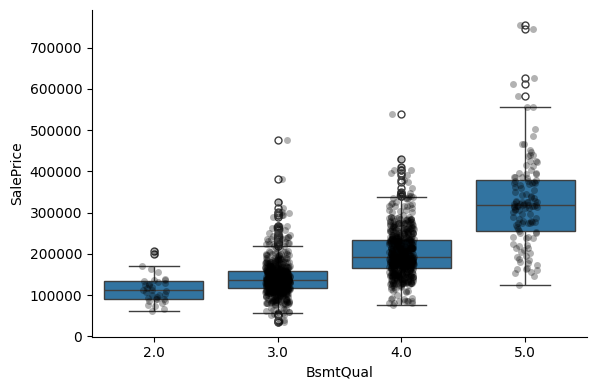

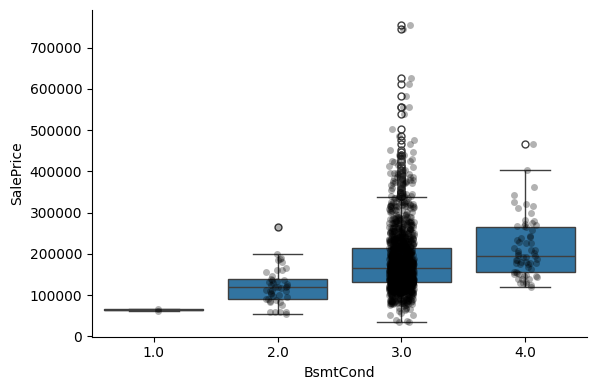

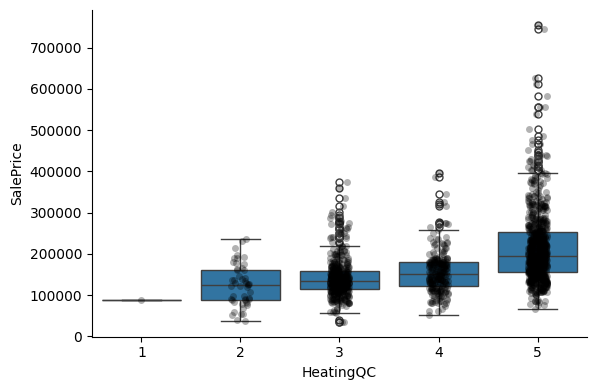

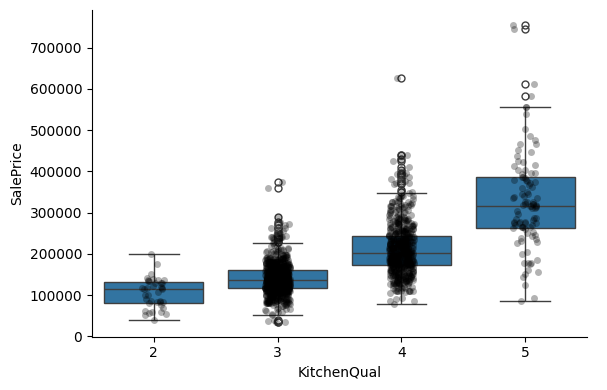

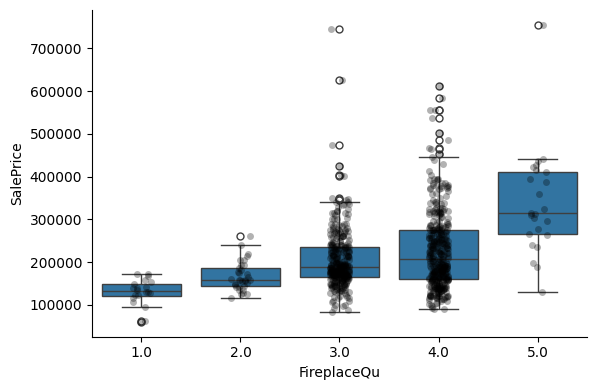

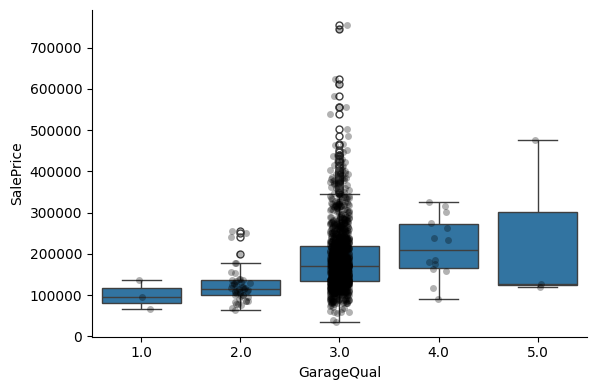

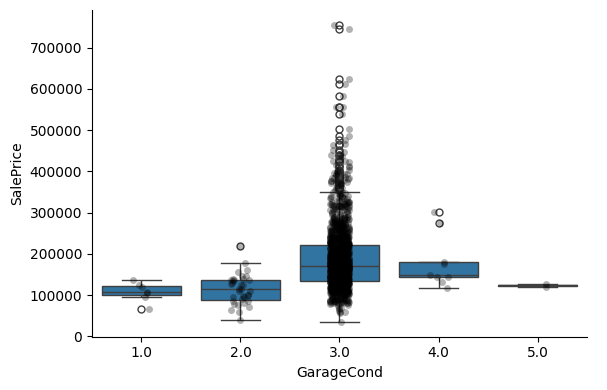

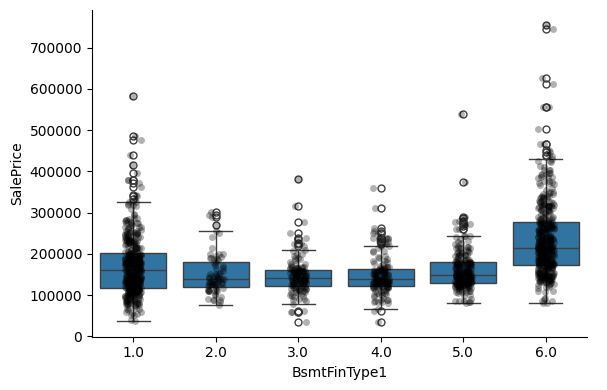

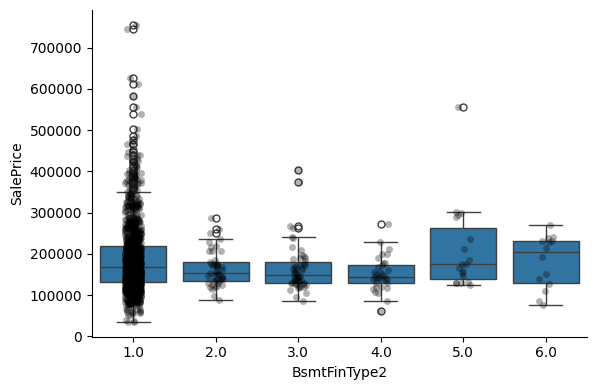

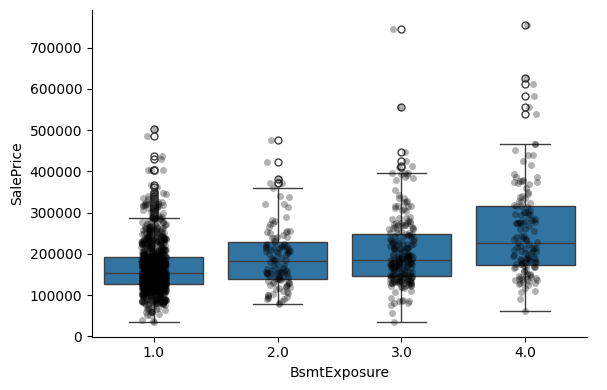

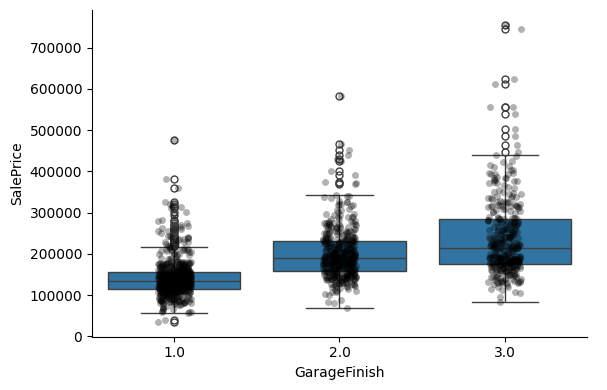

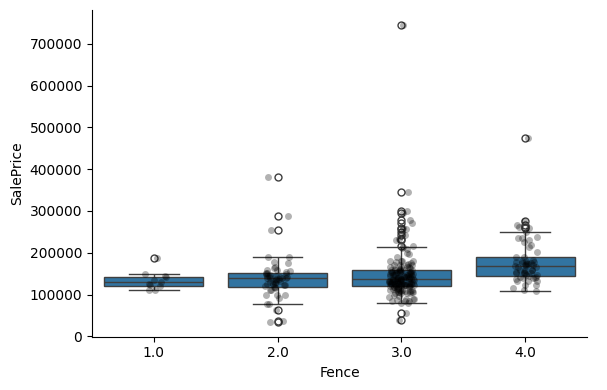

In [52]:
# ahora vamos a graficar el precio de venta promedio de la casa basado en la calidad de los
# varios atributos

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Para la mayoría de los atributos, el aumento en el precio de la casa con el valor de la variable es bastante claro.

In [55]:
# capturamos las variables categóricas restantes
# (aquellas que no reasignamos)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

## Rare labels:

Vamos a investigar ahora si hay etiquetas que están presentes solo en un pequeño número de casas:

In [56]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Algunas de las variables categóricas muestran múltiples etiquetas que están presentes en menos del 1% de las casas.

Las etiquetas que están subrepresentadas en el conjunto de datos tienden a causar sobreajuste en los modelos de aprendizaje automático.

Es por eso que queremos eliminarlas.

Finalmente, queremos explorar la relación entre las categorías de las diferentes variables y el precio de venta de las casas:

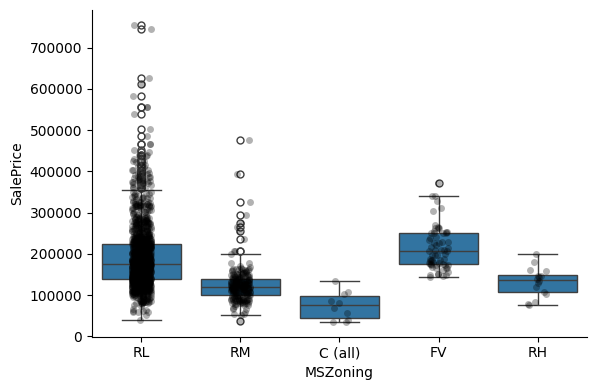

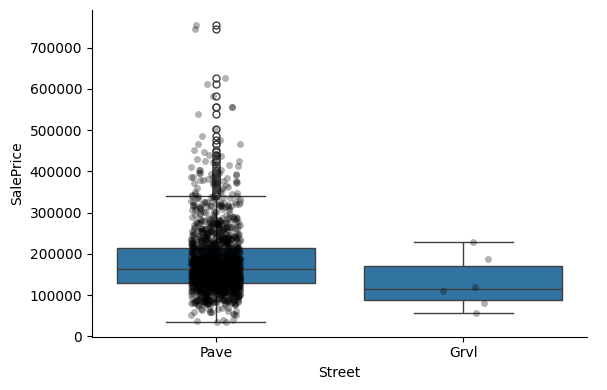

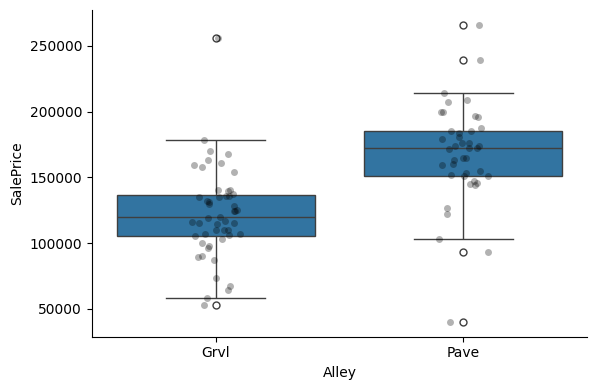

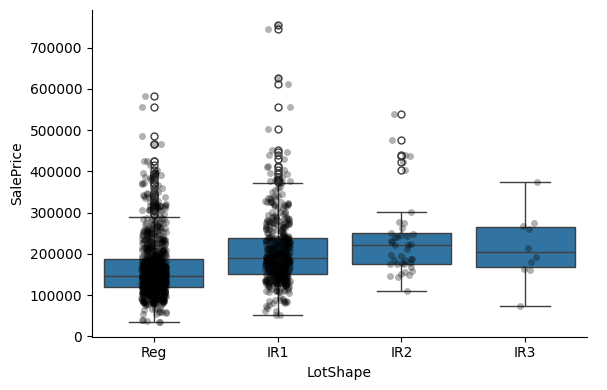

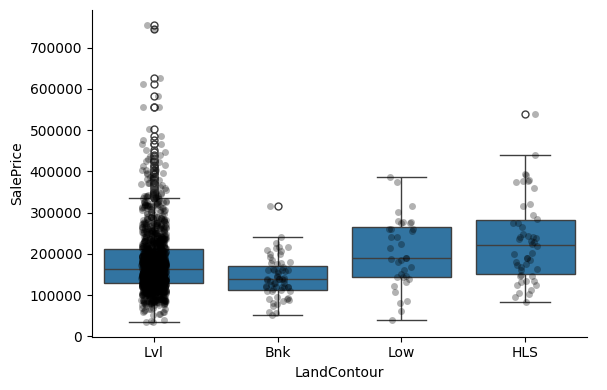

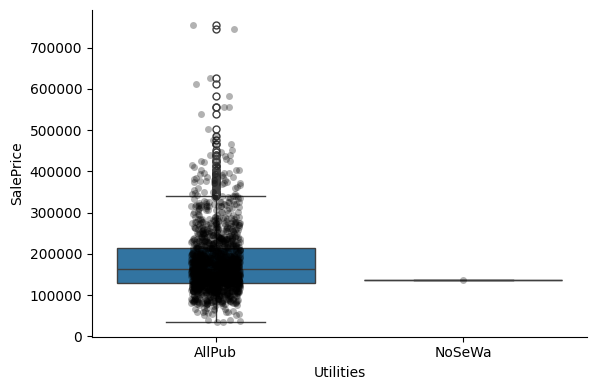

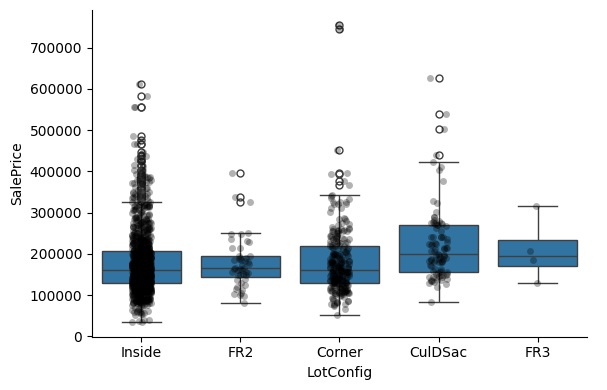

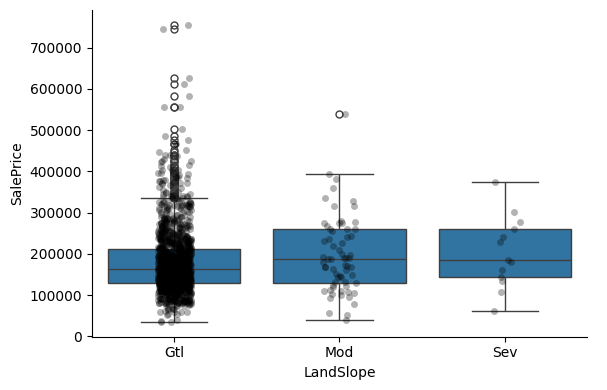

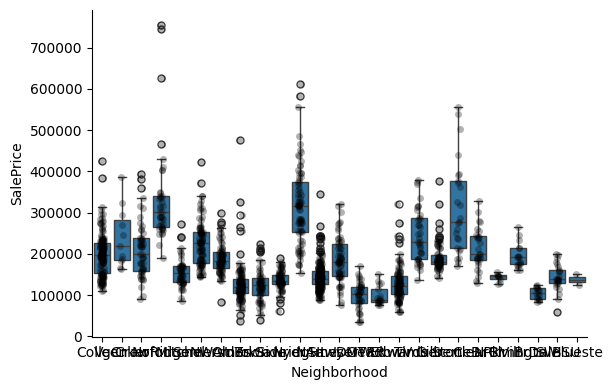

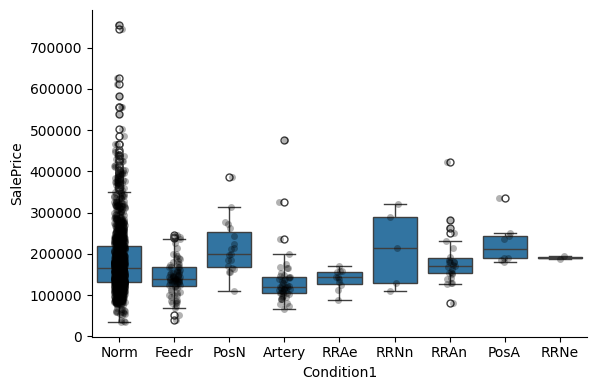

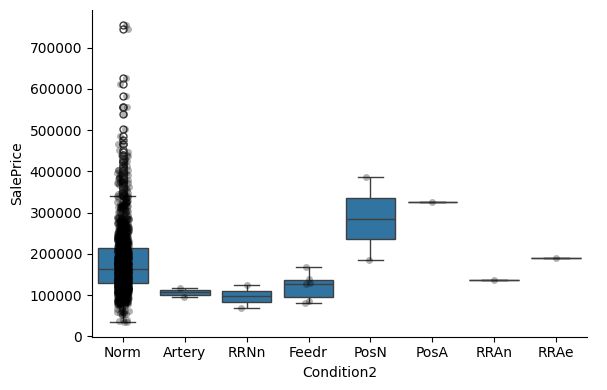

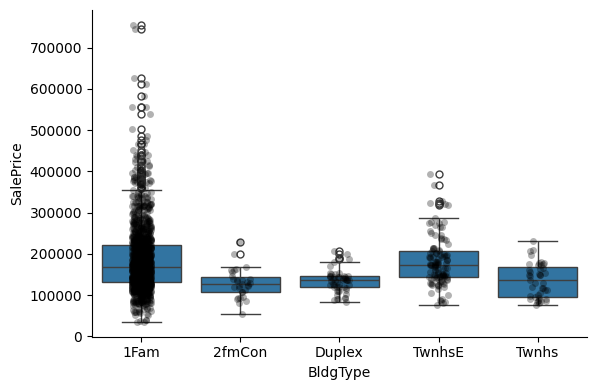

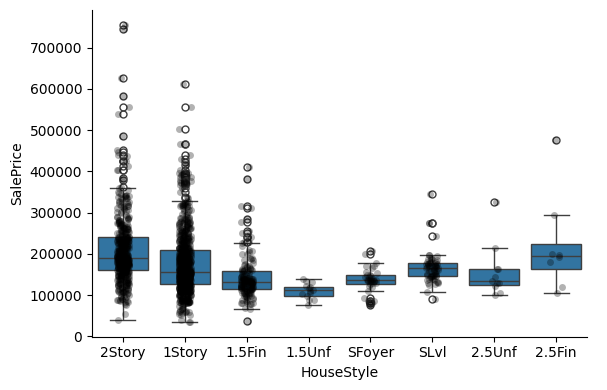

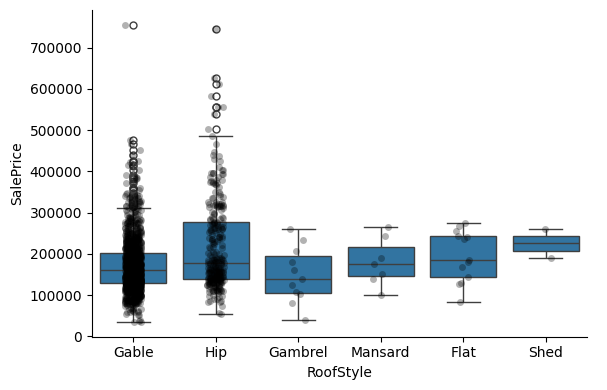

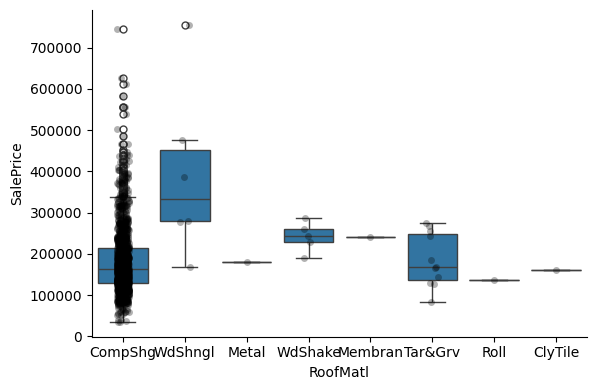

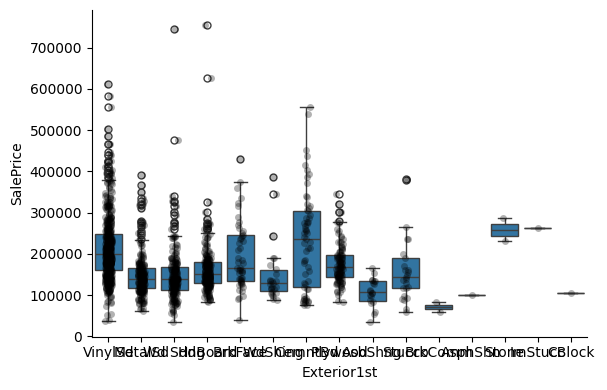

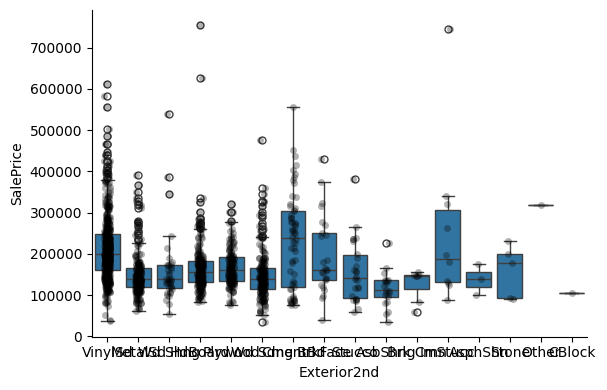

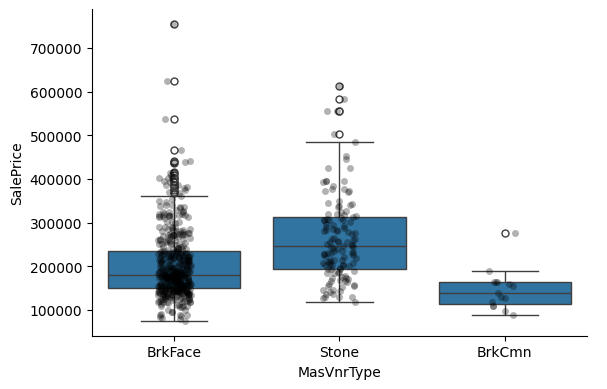

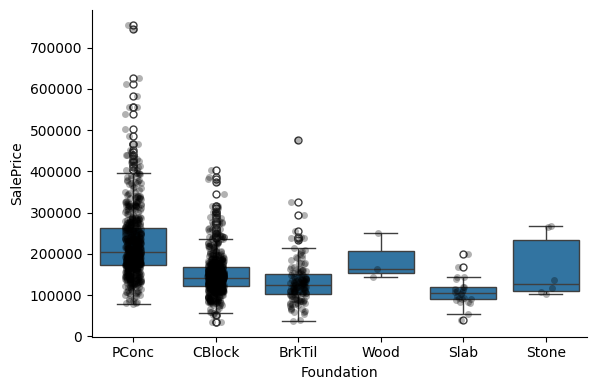

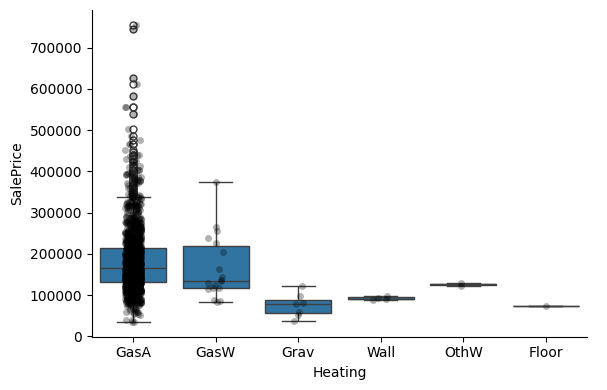

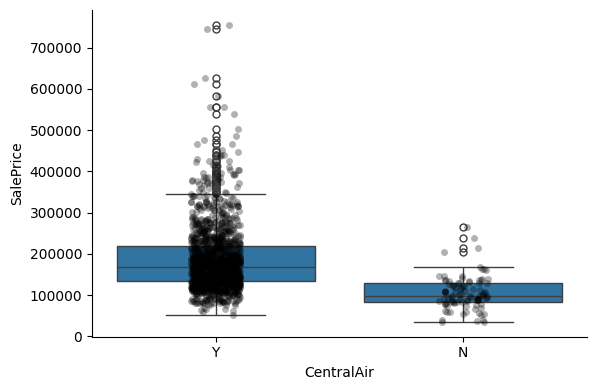

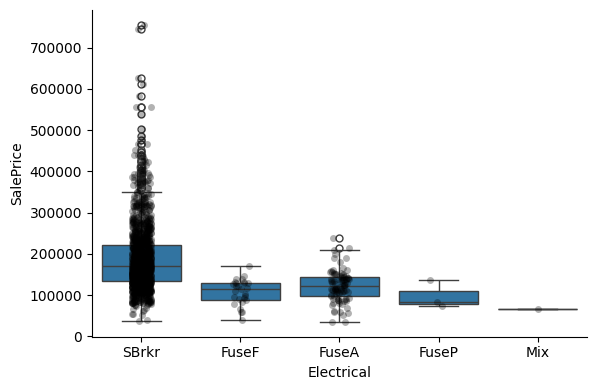

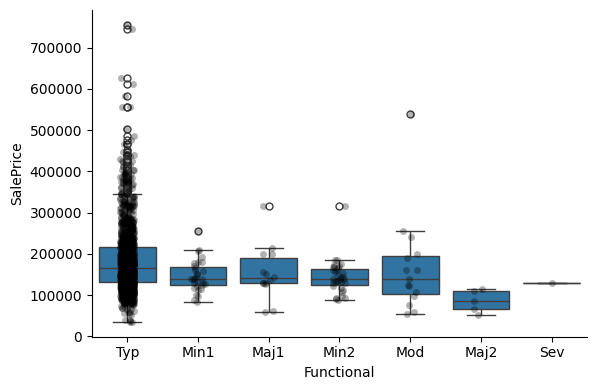

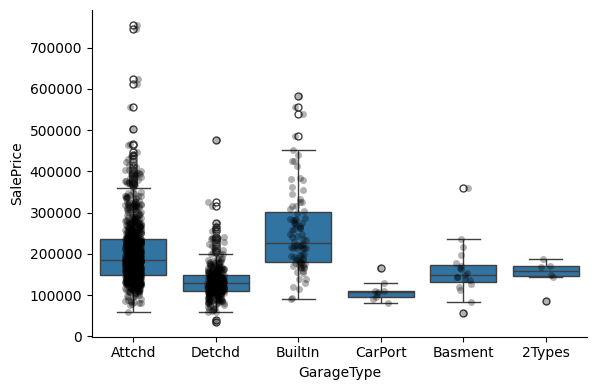

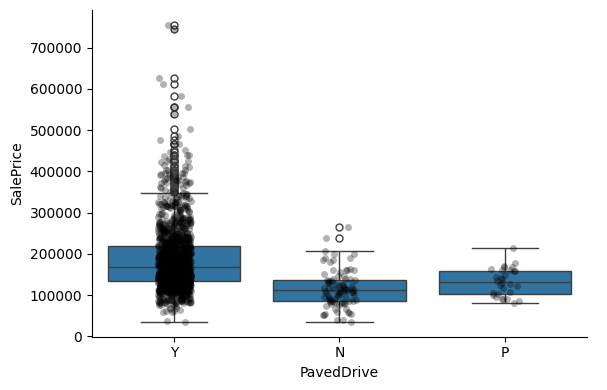

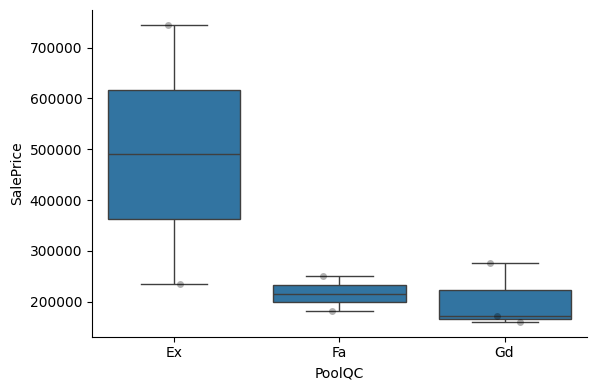

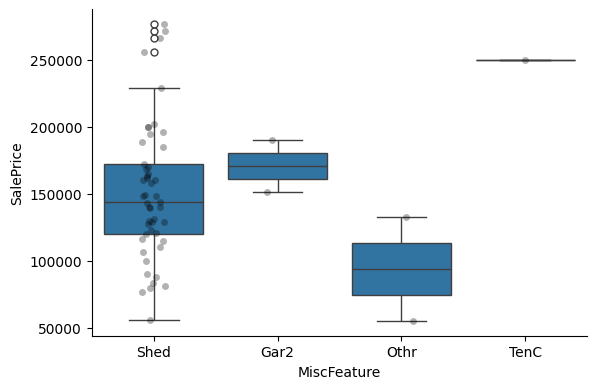

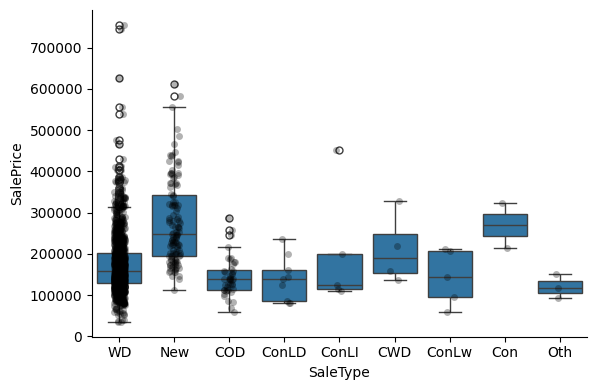

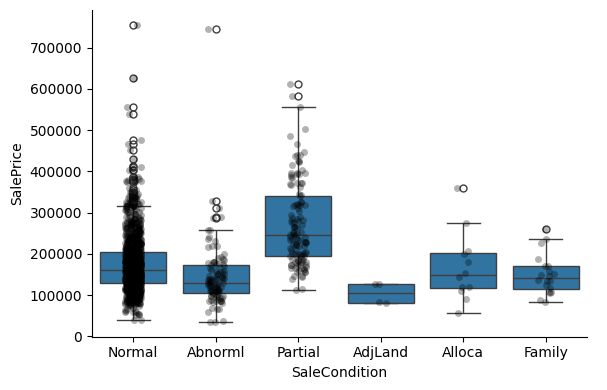

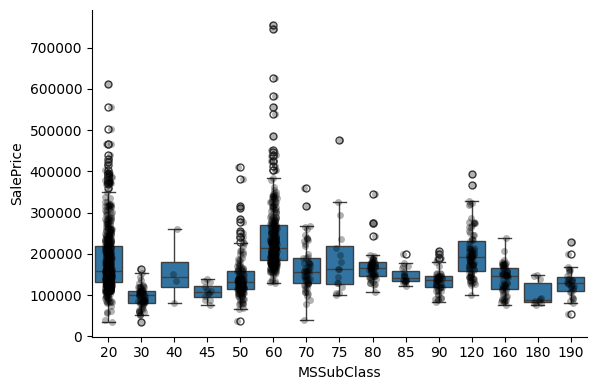

In [56]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Claramente, las categorías proporcionan información sobre el precio de venta, ya que diferentes categorías muestran diferentes precios de venta medianos.

**Disclaimer:**

Ciertamente, se puede hacer mucho más para entender la naturaleza de estos datos y la relación de estas variables con el objetivo, SalePrice. Y también sobre la distribución de las propias variables.

Sin embargo, esperamos que a través de este Notebook te hayamos dado una idea de cómo se ve el análisis de datos.